# Predicting CardioVascular Disease
Angel Rangelov, Zuhayer Hoque, Aninda Ashan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
import warnings

# Data From CSV before removing outliers

In [2]:
#importing csv file
data_visuals= pd.read_csv("cardio_train.csv", delimiter=';')
data = pd.read_csv("cardio_train.csv", delimiter = ';')
data_visuals.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


# Checking the initial dimensions of the dataset

In [3]:
data_visuals.shape

(70000, 13)

# checking for any null values# 

In [4]:
data_visuals.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

# No duplicate data

In [5]:
data_dup = data_visuals.duplicated().any()
data_dup

False

# Converting categorical features from their numeric codes into categorical features

In [58]:
pd.options.mode.chained_assignment = None
data_visuals["age"] = data_visuals.age.apply(lambda x: x//365)

data_visuals["gender"] = data_visuals["gender"].apply(lambda x: 'male' if x == 2 else 'female')

data_visuals["cholesterol"][data_visuals["cholesterol"] == 1] = 'normal'
data_visuals["cholesterol"][data_visuals["cholesterol"] == 2] = 'above_normal'
data_visuals["cholesterol"][data_visuals["cholesterol"] == 3] = 'well_above_normal'

data_visuals["gluc"][data_visuals["gluc"] == 1] = 'normal'
data_visuals["gluc"][data_visuals["gluc"] == 2] = 'above_normal'
data_visuals["gluc"][data_visuals["gluc"] == 3] = 'well_above_normal'

data_visuals["cardio"][data_visuals["cardio"] == 0] = 'no_CVD'
data_visuals["cardio"][data_visuals["cardio"] == 1] = 'CVD'

data_visuals["smoke"][data_visuals["smoke"] == 0] = 'non_smoker'
data_visuals["smoke"][data_visuals["smoke"] == 1] = 'smoker'

data_visuals["active"][data_visuals["active"] == 0] = 'does_not_exercise'
data_visuals["active"][data_visuals["active"] == 1] = 'exercise'

data_visuals["alco"][data_visuals["alco"] == 0] = 'non-drinker'
data_visuals["alco"][data_visuals["alco"] == 1] = 'drinker'

data_visuals.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,0,female,168,62.0,110,80,normal,normal,non_smoker,non-drinker,exercise,no_CVD
1,1,0,female,156,85.0,140,90,well_above_normal,normal,non_smoker,non-drinker,exercise,CVD
2,2,0,female,165,64.0,130,70,well_above_normal,normal,non_smoker,non-drinker,does_not_exercise,CVD
3,3,0,female,169,82.0,150,100,normal,normal,non_smoker,non-drinker,exercise,CVD
4,4,0,female,156,56.0,100,60,normal,normal,non_smoker,non-drinker,does_not_exercise,no_CVD


# Checking value counts for Blood Pressure

In [7]:
data_visuals["ap_hi"].value_counts()

 120     27699
 140      9506
 130      8961
 110      8644
 150      4450
         ...  
 1620        1
 199         1
-150         1
-115         1
 2000        1
Name: ap_hi, Length: 153, dtype: int64

In [8]:
data_visuals["ap_lo"].value_counts()

80     34847
90     14316
70     10245
100     4082
60      2727
       ...  
56         1
182        1
810        1
9          1
602        1
Name: ap_lo, Length: 157, dtype: int64

# Distribution of Dataset

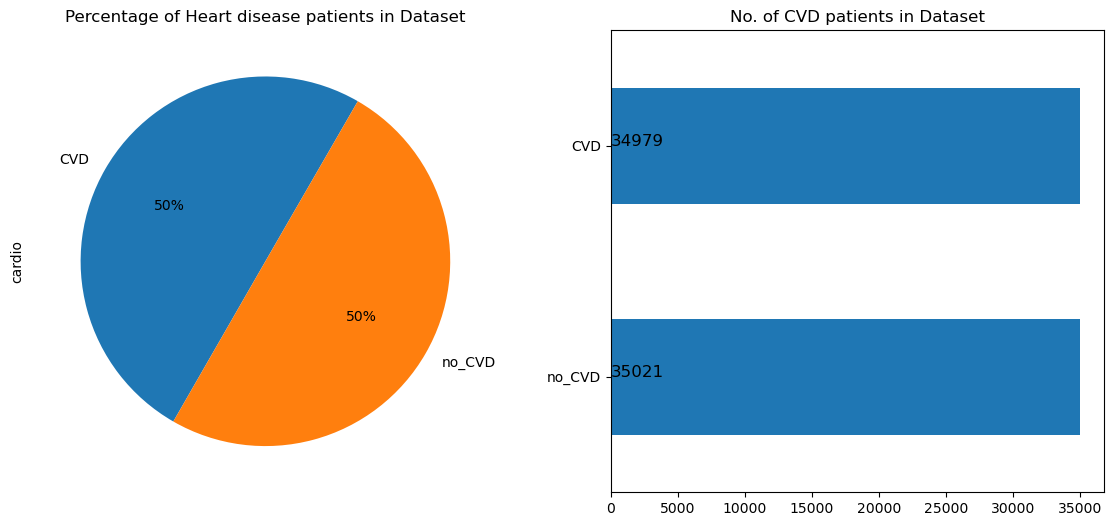

In [9]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharey=False, figsize=(14,6))

ax1 = data_visuals["cardio"].value_counts().plot.pie( x="Heart disease" ,y ='no.of patients', 
                   autopct = "%1.0f%%",labels=["CVD","no_CVD"], startangle = 60,ax=ax1);
ax1.set(title = 'Percentage of Heart disease patients in Dataset')

ax2 = data_visuals["cardio"].value_counts().plot(kind="barh" ,ax =ax2)
for i,j in enumerate(data_visuals["cardio"].value_counts().values):
    ax2.text(.5,i,j,fontsize=12)
ax2.set(title = 'No. of CVD patients in Dataset')
plt.show()

# Checking gender and age wise distribution

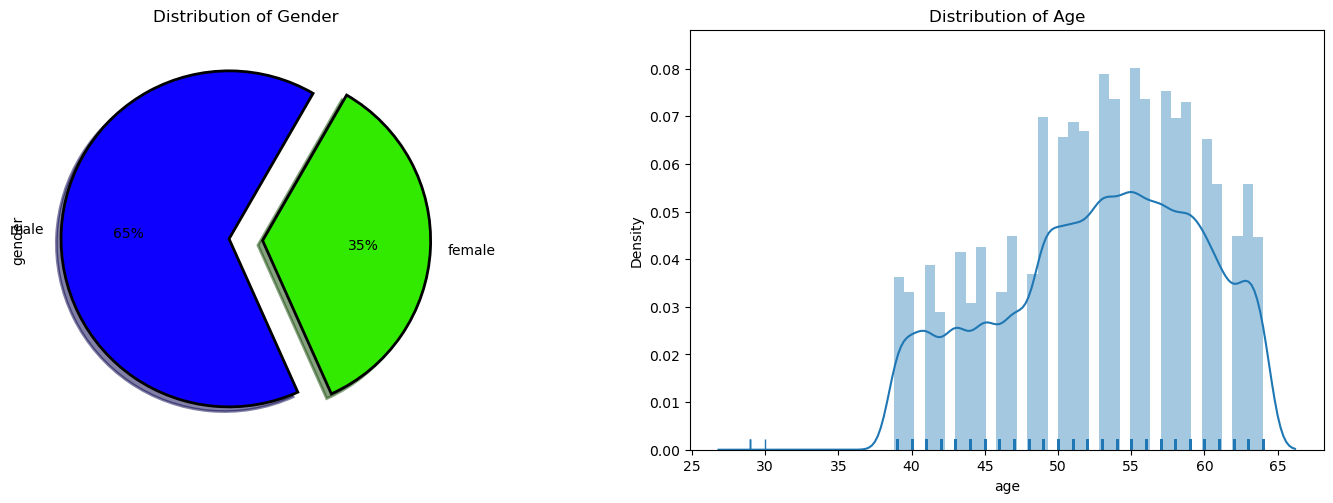

In [10]:
warnings.filterwarnings("ignore", category=FutureWarning)
plt.figure(figsize=(18,12))
plt.subplot(221)
data_visuals["gender"].value_counts().plot.pie(autopct = "%1.0f%%",colors = sns.color_palette("prism",5),startangle = 60,labels=["male","female"],
wedgeprops={"linewidth":2,"edgecolor":"k"},explode=[.1,.1],shadow =True)
plt.title("Distribution of Gender")
plt.subplot(222)
ax= sns.distplot(data_visuals["age"], rug=True)
plt.title("Distribution of Age")
plt.show()

# Male patient data count is much larger than female and average age of patients is around 55

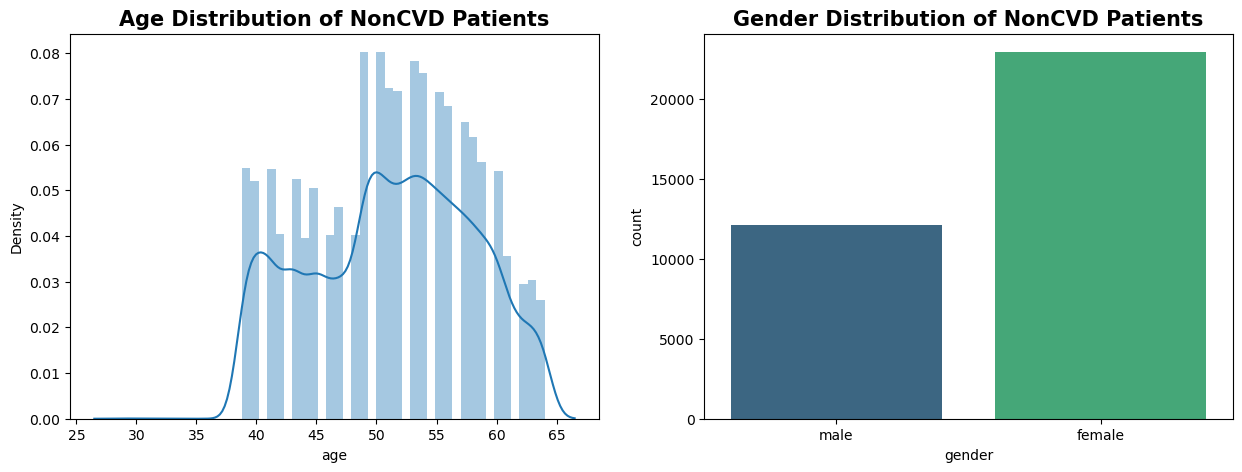

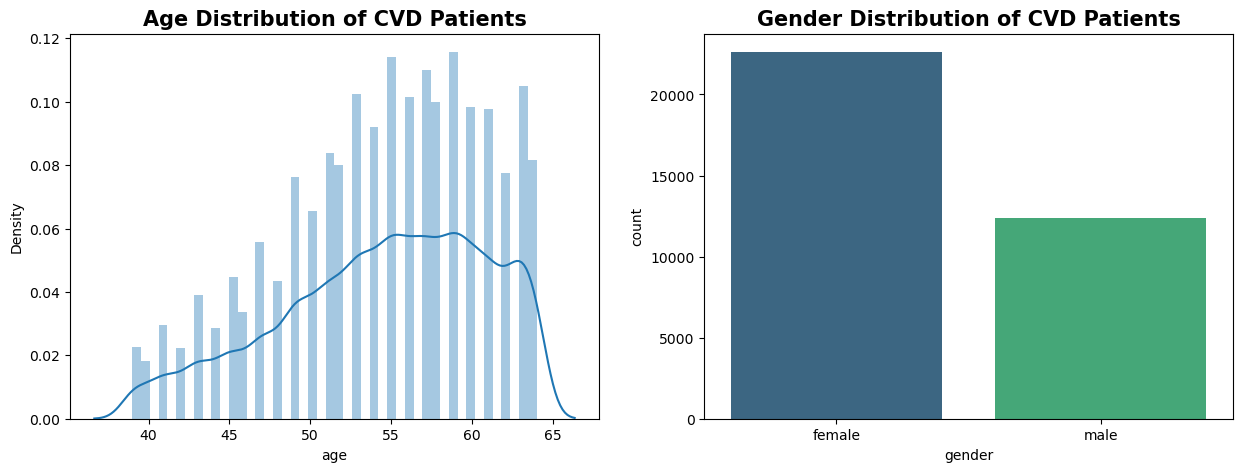

In [11]:
warnings.filterwarnings("ignore", category=FutureWarning)
# creating seperate dfs for CVD and NonCVD
attr_1=data_visuals[data_visuals['cardio']== 'CVD']

attr_0=data_visuals[data_visuals['cardio']== 'no_CVD']

# plotting NonCVD patients

fig = plt.figure(figsize=(15,5))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.distplot(attr_0['age'])
plt.title('Age Distribution of NonCVD Patients', fontsize=15, weight='bold')

ax1 = plt.subplot2grid((1,2),(0,1))
sns.countplot(x = attr_0['gender'], palette='viridis')
plt.title('Gender Distribution of NonCVD Patients', fontsize=15, weight='bold' )
plt.show()

#plotting CVD patients

fig = plt.figure(figsize=(15,5))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.distplot(attr_1['age'])
plt.title('Age Distribution of CVD Patients', fontsize=15, weight='bold')

ax1 = plt.subplot2grid((1,2),(0,1))
sns.countplot(x = attr_1['gender'], palette='viridis')
plt.title('Gender Distribution of CVD Patients', fontsize=15, weight='bold' )
plt.show()

# From the age and gender distribution plots, we see that the average age for diseased patients is around 60 years and the distribution is left-skewed. Much more female patients have Cardiovascular Disease, in our dataset.
# From the age and gender distribution plots, we see that the average age for normal patients is around 50 years. Much more female patients do not have Cardiovascular Disease, in our dataset.

# Data Quality Report Before Outlier Removal (Continuous Features)

In [33]:
# DATA QUALITY REPORT FOR CONT. FEATURES

data_quality_cont = data[["age","height","weight","ap_hi","ap_lo"]].describe().T


# % of Missing Column
print("Data Quality Report for Cont. Features")
col_name = ["age","height","weight","ap_hi","ap_lo"]
percmiss = []
for col_name in col_name :
    percmiss.append((data[col_name].isnull().sum()/len(data[col_name]))*100)
data_quality_cont["% of Missing"] = percmiss
data_quality_cont = data_quality_cont.rename(columns={'50%': 'Median', '25%': 'Q1','75%':'Q3'})
data_quality_cont


Data Quality Report for Cont. Features


,count,mean,std,min,Q1,Median,Q3,max,% of Missing
age,70000.0,19468.865814,2467.251667,10798.0,17664.0,19703.0,21327.0,23713.0,0.0
height,70000.0,164.359229,8.210126,55.0,159.0,165.0,170.0,250.0,0.0
weight,70000.0,74.205690,14.395757,10.0,65.0,72.0,82.0,200.0,0.0
ap_hi,70000.0,128.817286,154.011419,-150.0,120.0,120.0,140.0,16020.0,0.0
ap_lo,70000.0,96.630414,188.472530,-70.0,80.0,80.0,90.0,11000.0,0.0


# Data Quality Report Before Outlier Removal (Categorical Features)

In [25]:
# DATA QUALITY REPORT FOR CATG. FEATURES
data_quality_catg = data[["gender","cholesterol","gluc","smoke","alco","active"]].astype('object').describe().T
print("Data Quality Report for Categ. Features")
data_quality_catg

Data Quality Report for Categ. Features


,count,unique,top,freq
gender,70000,2,1,45530
cholesterol,70000,3,1,52385
gluc,70000,3,1,59479
smoke,70000,2,0,63831
alco,70000,2,0,66236
active,70000,2,1,56261


# Density Plot for Cont. Features before removing Outliers

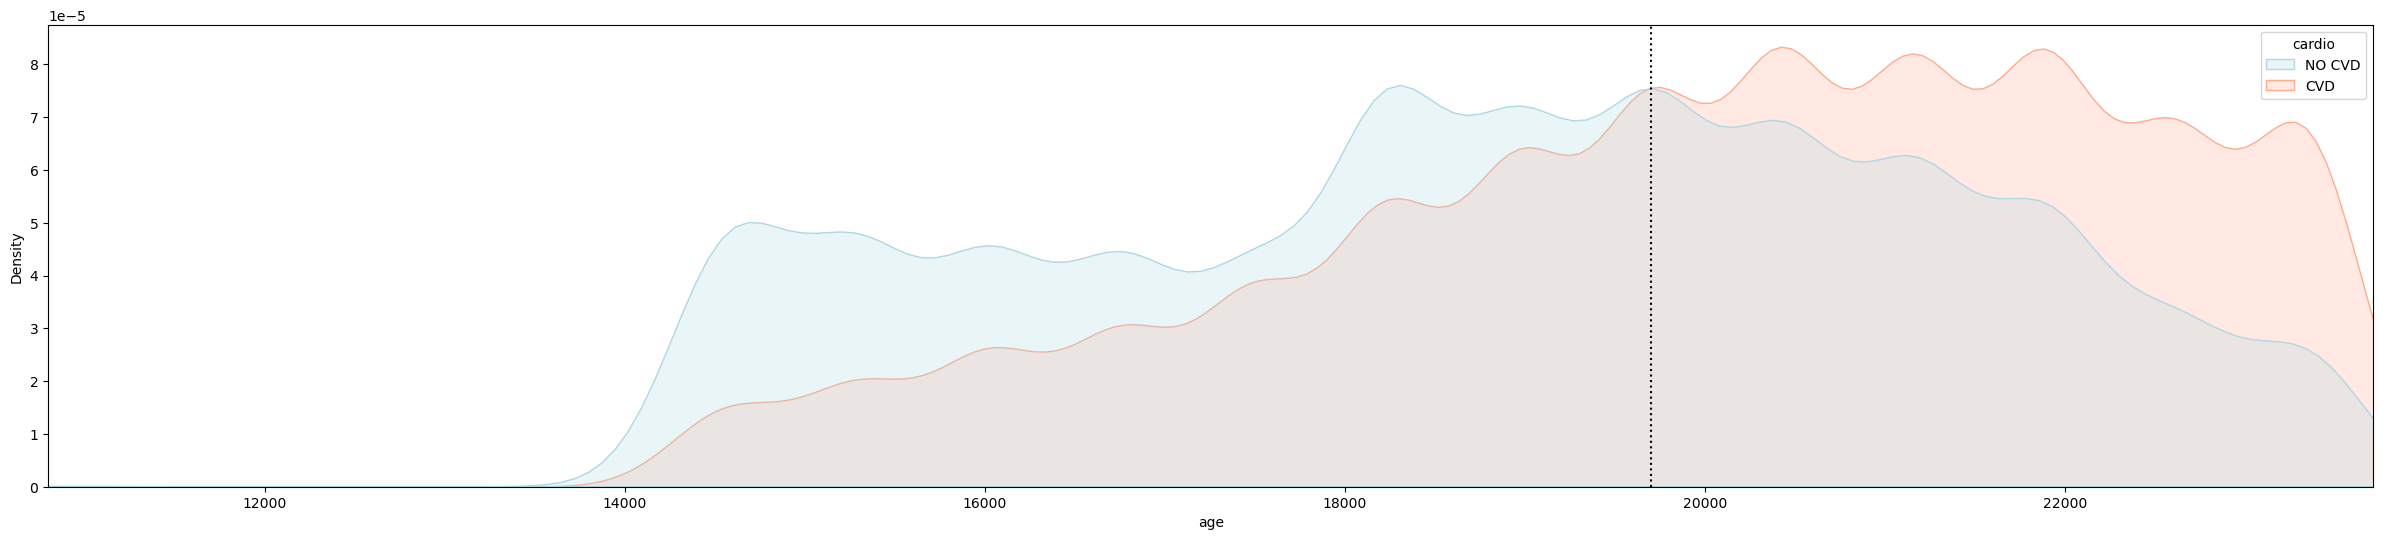

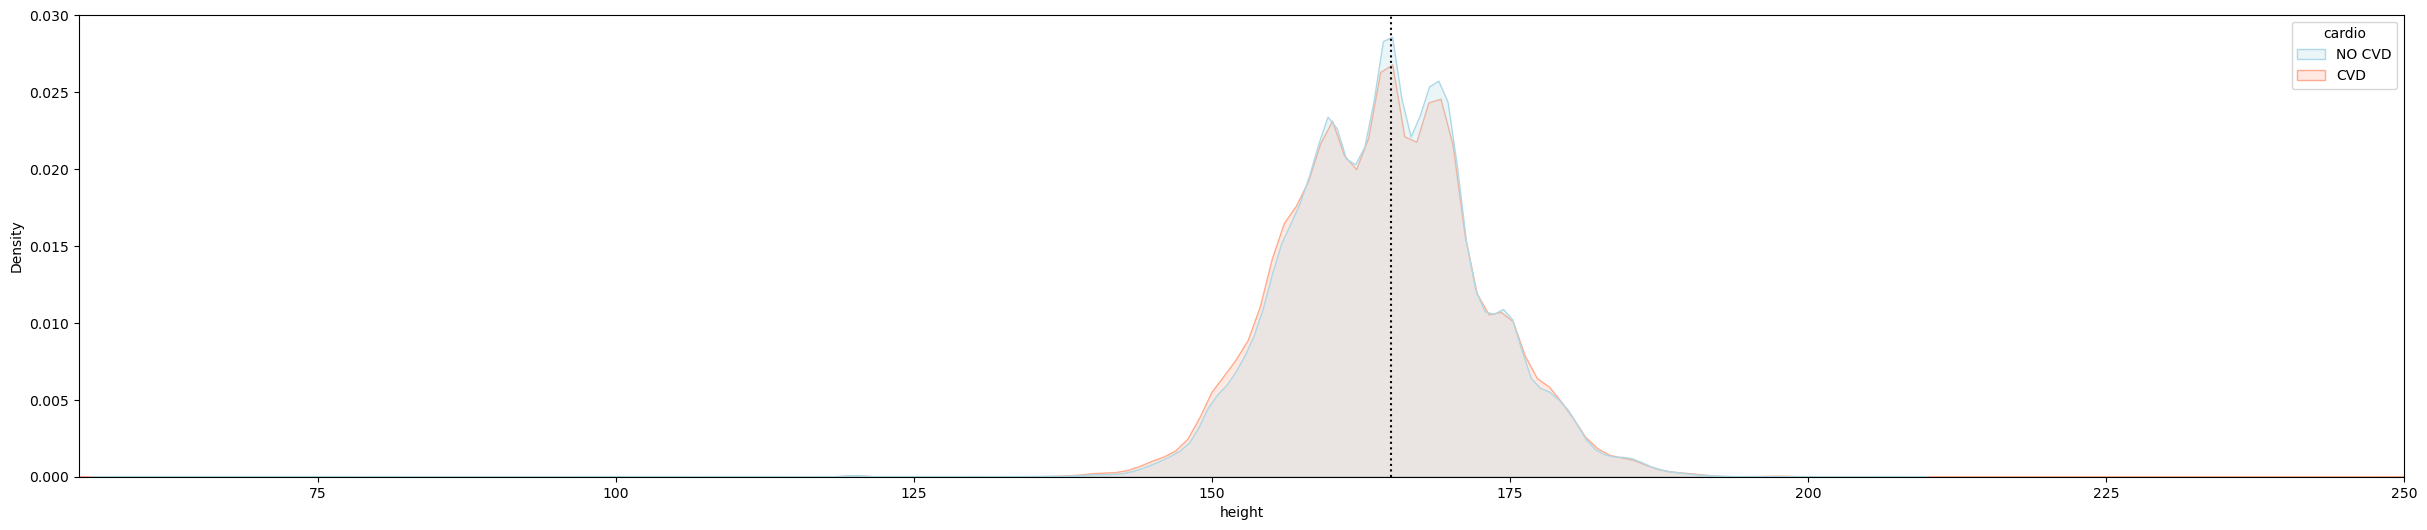

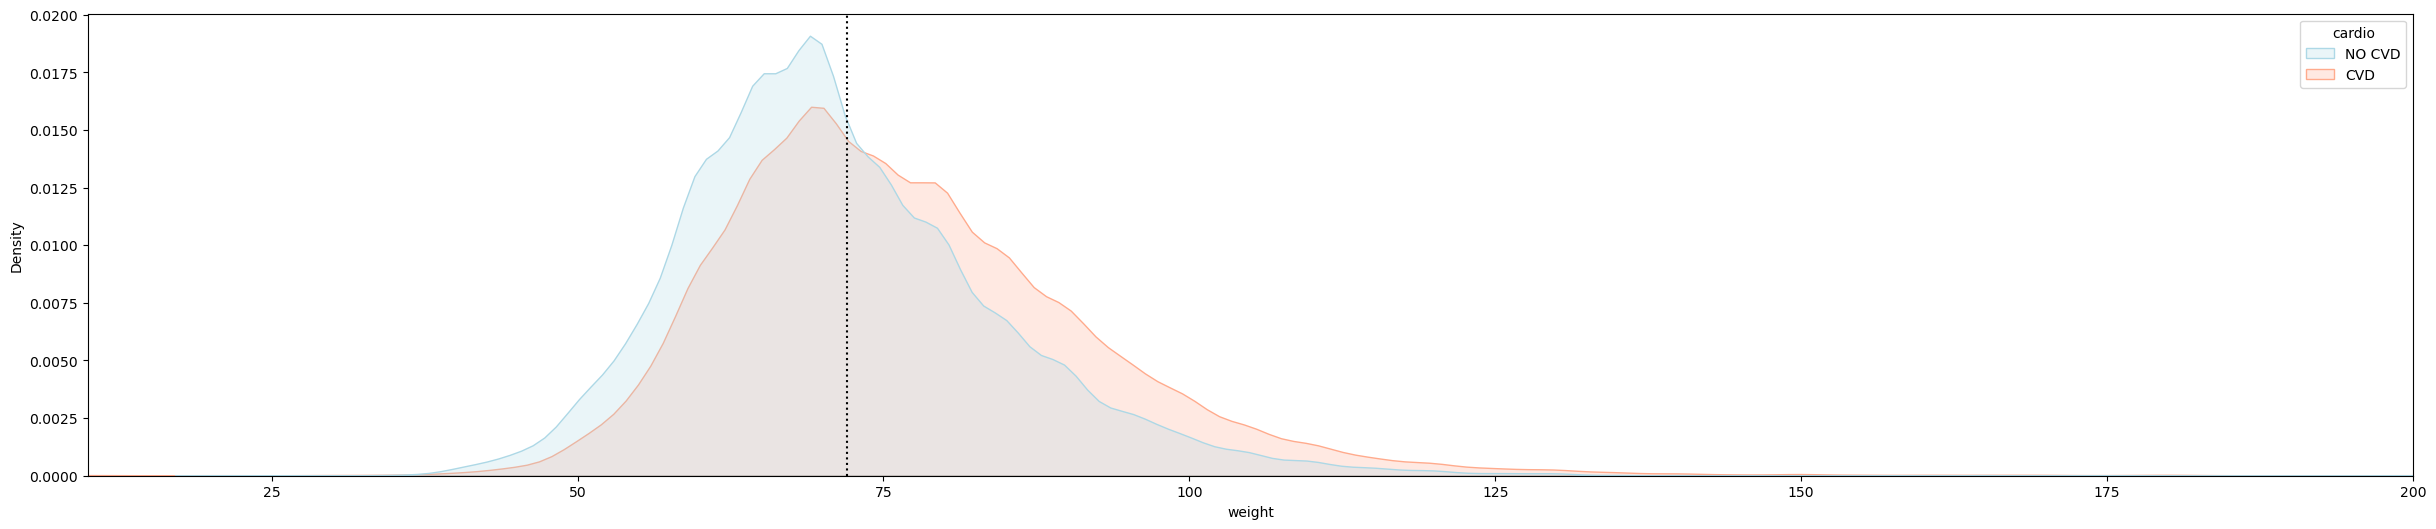

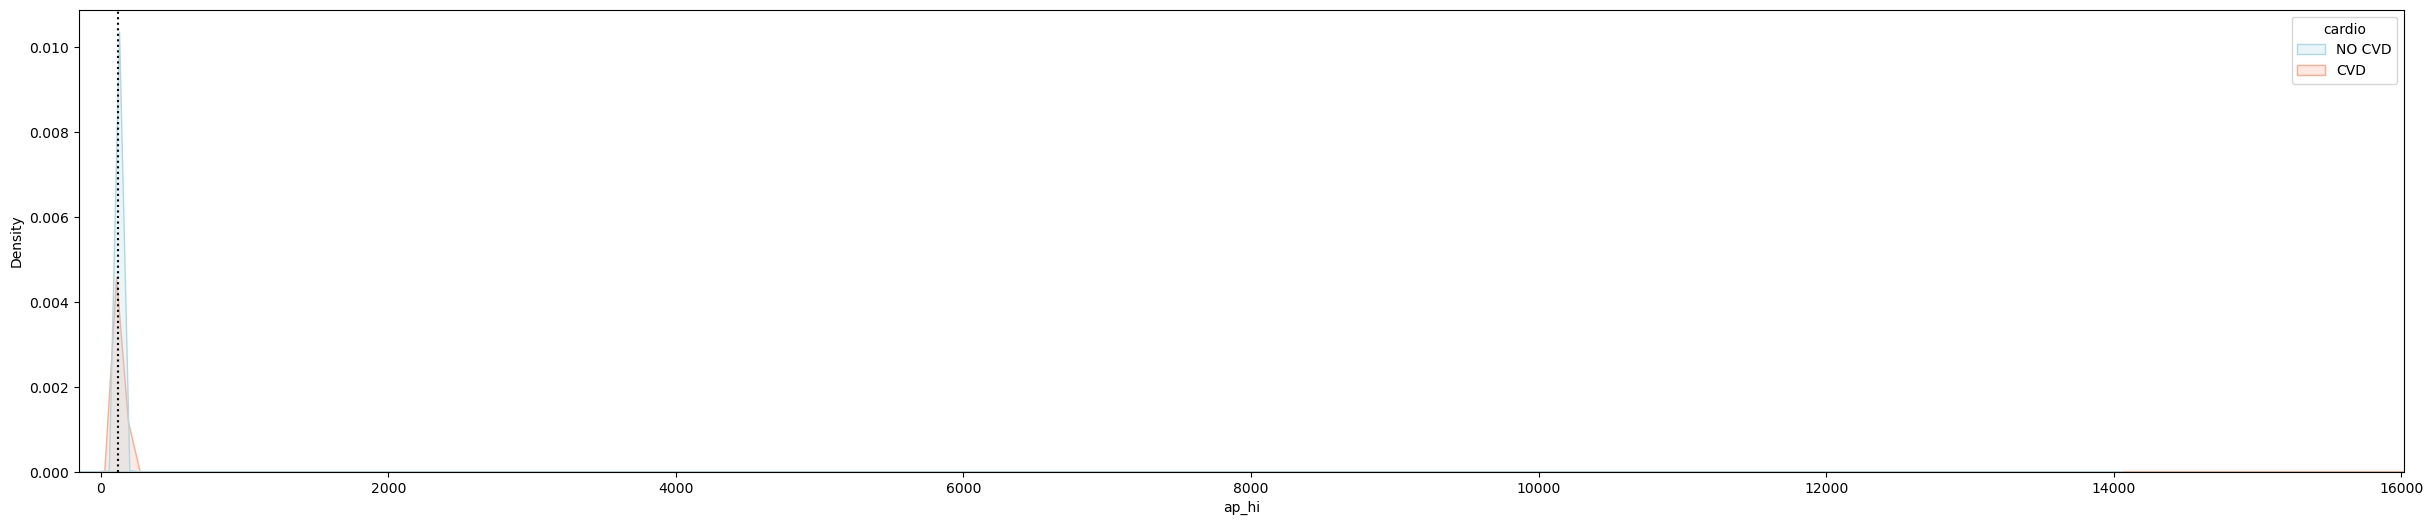

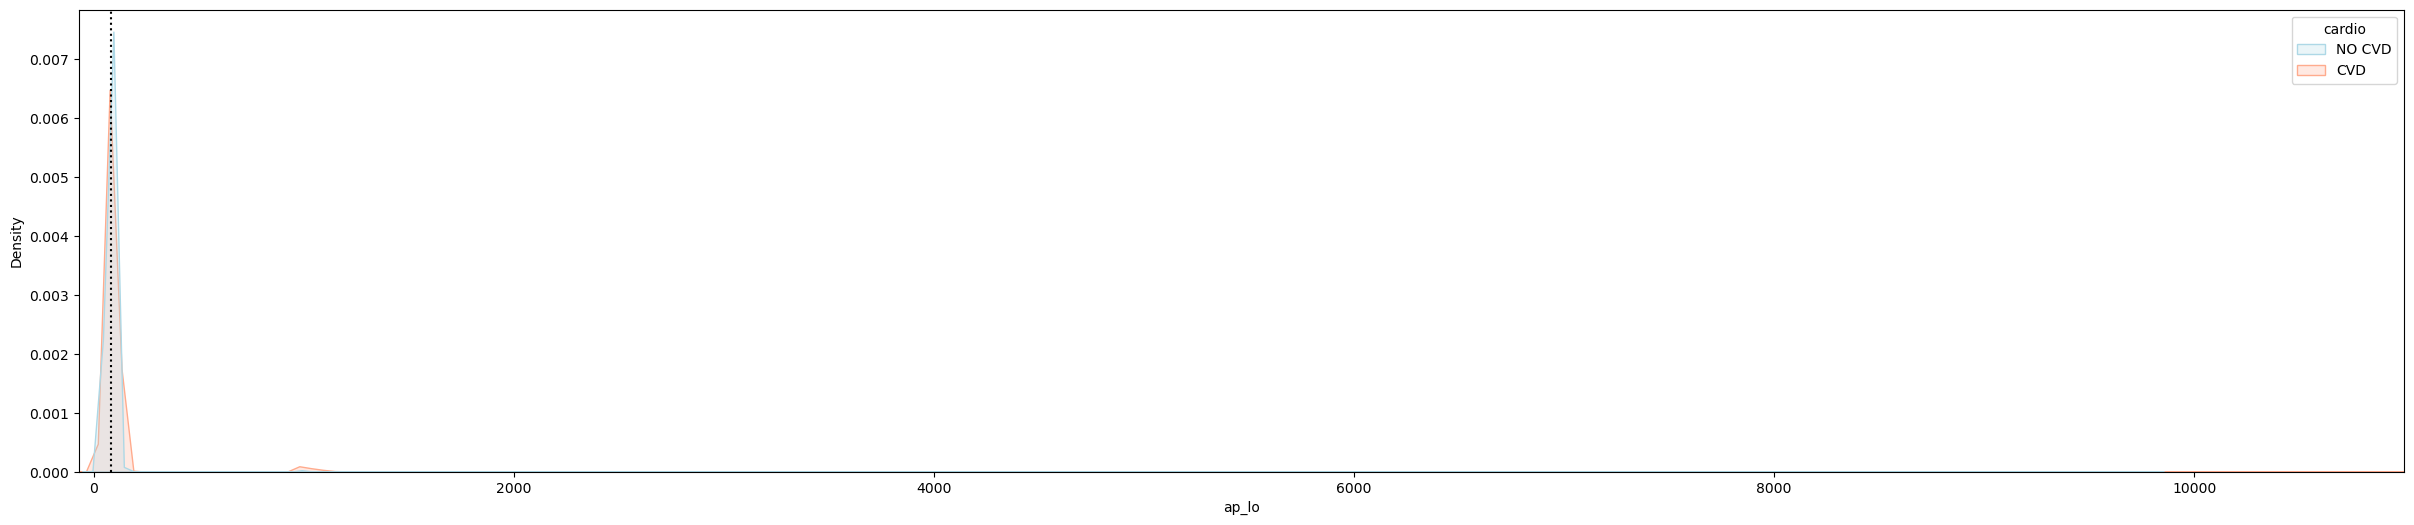

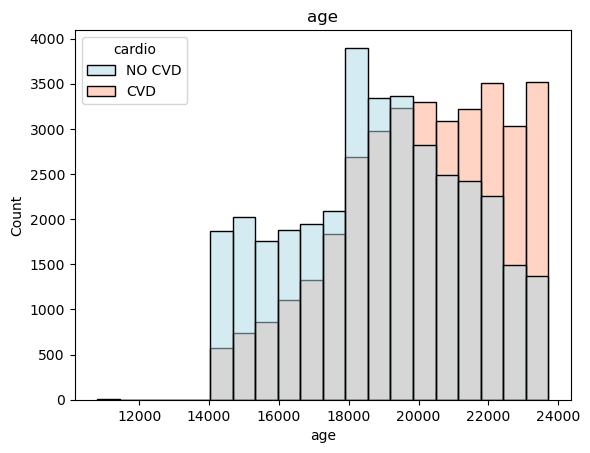

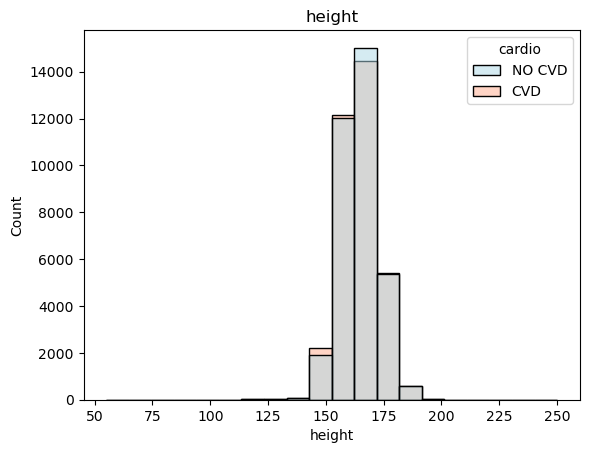

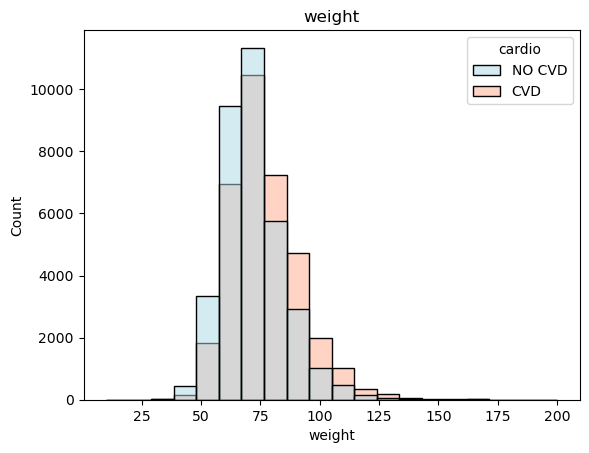

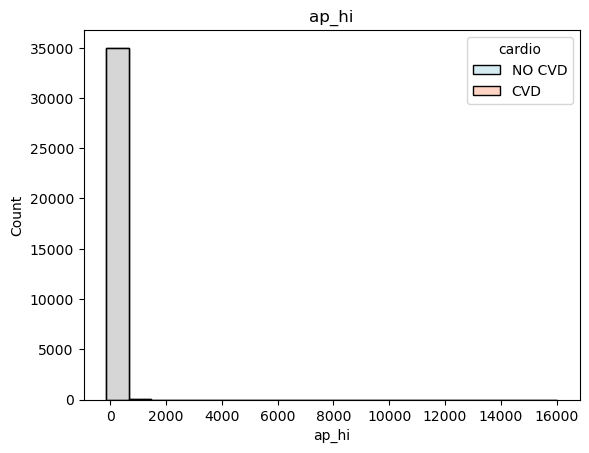

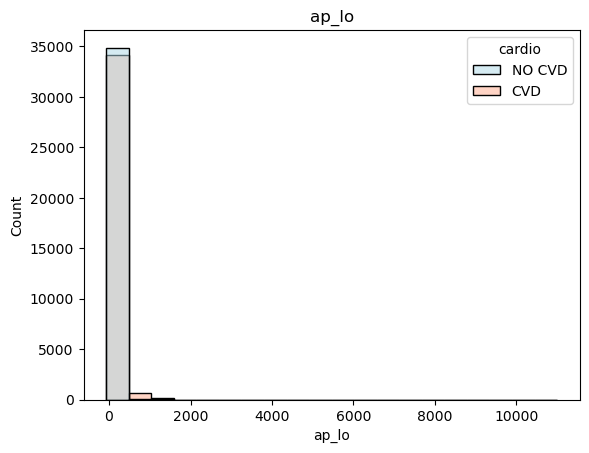

In [12]:
# Density Plot for Cont. Features
cardio=data['cardio'].replace({0: 'NO CVD', 1: 'CVD'})

conticolumns=data[['age','height','weight','ap_hi','ap_lo']]


for colu in conticolumns:
    
    plt.figure(figsize=(30, 6))
    
   
    sns.kdeplot(data[colu], hue=cardio, fill=True,palette=["#ADD8E6","#ffab8d"],label=colu)
    median_value = data[colu].median()
   
    plt.axvline(median_value, color='black', linestyle=':')
    plt.xlim(data[colu].min(), data[colu].max())
   
    plt.show()

    
num_bins = 20


for col in conticolumns:
    plt.figure()
    sns.histplot(data=data,hue=cardio, x=col, bins=num_bins,palette=["#ADD8E6","#ffab8d"])
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.title(col)
    


plt.show()



# Count Plot for Categorical Features. before removing Outliers

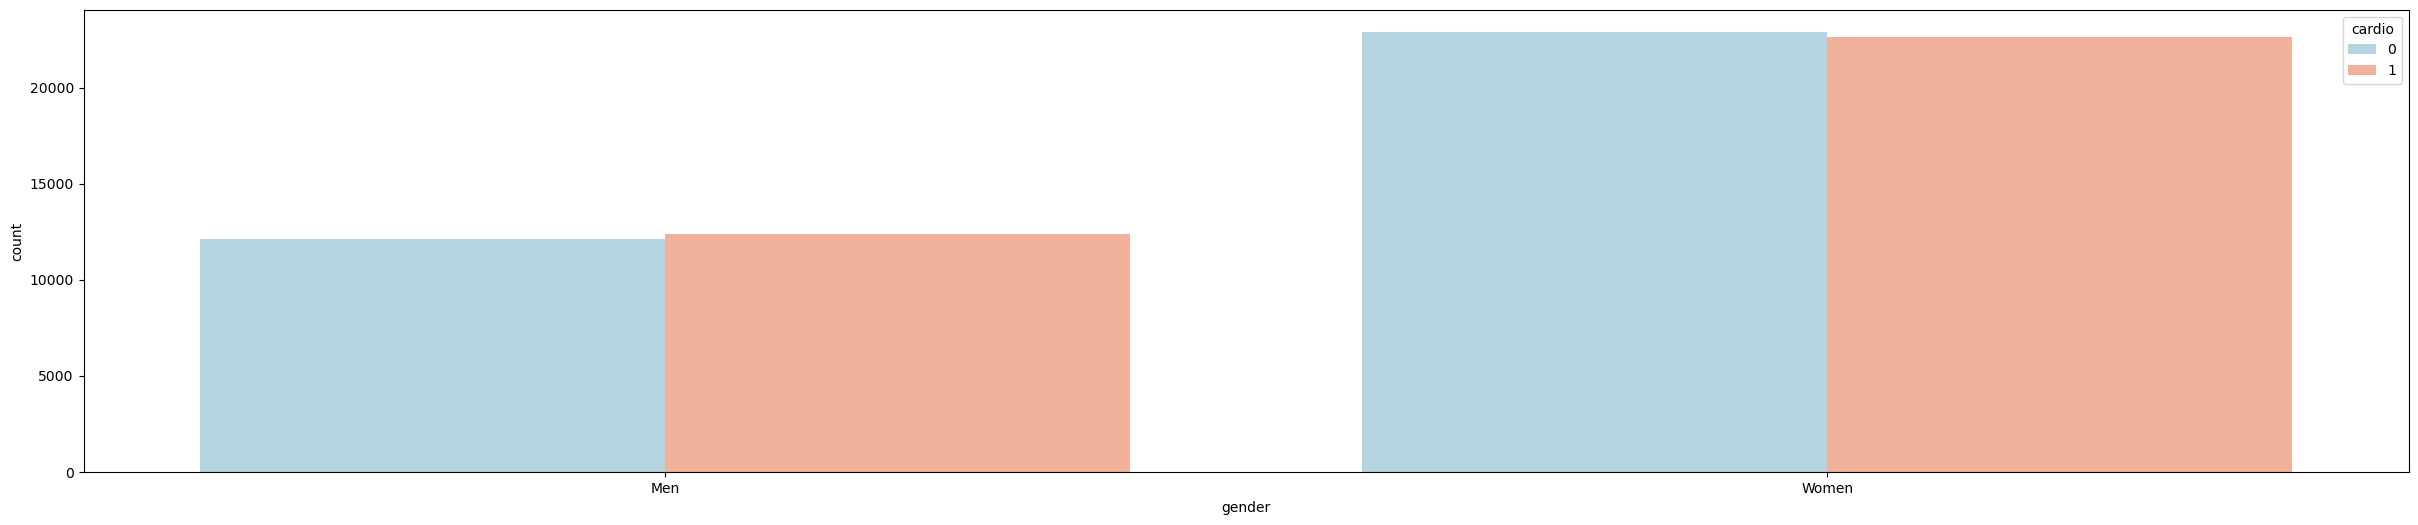

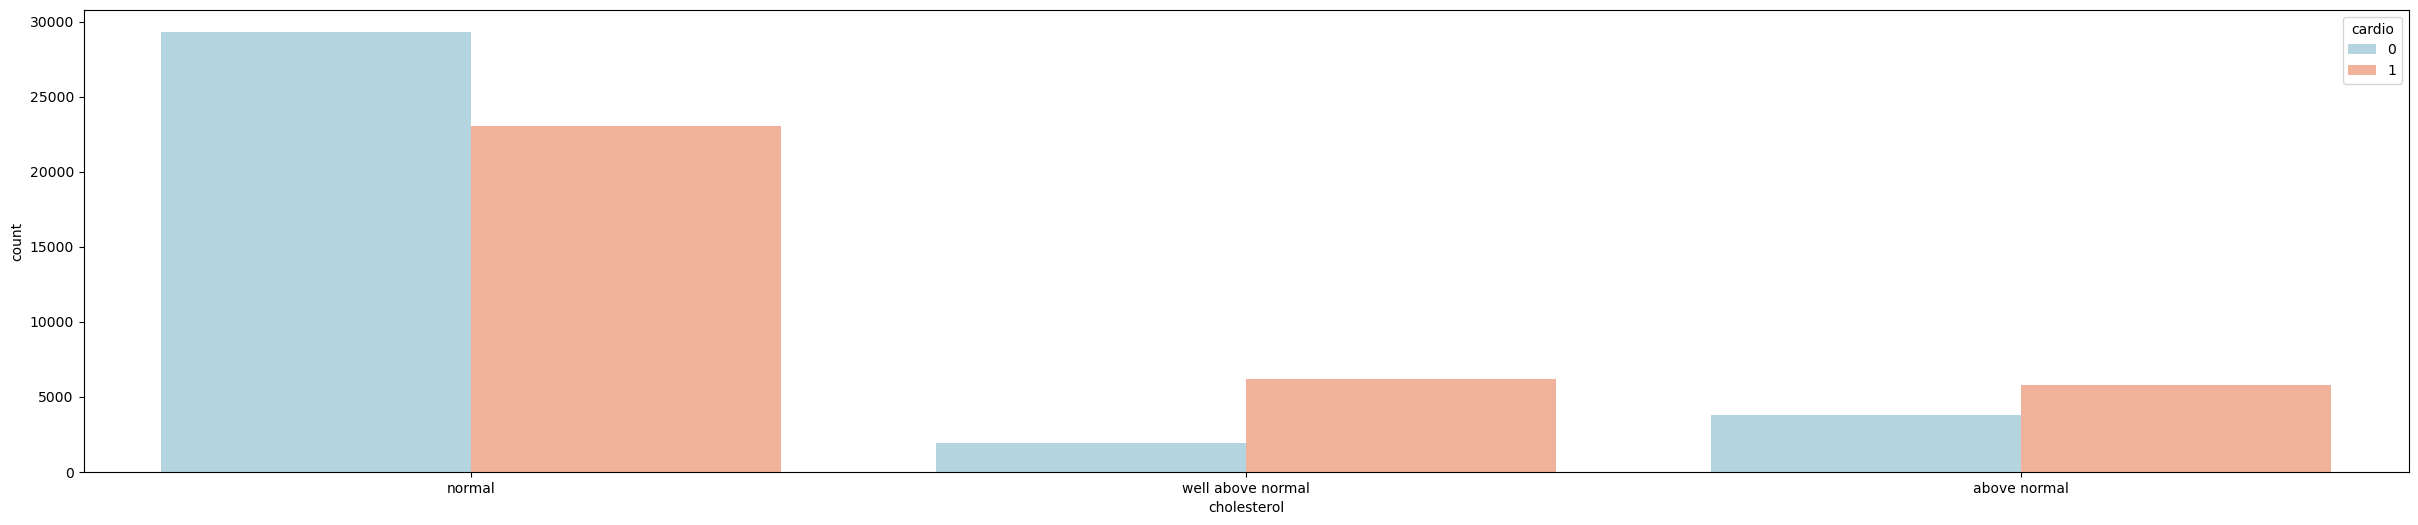

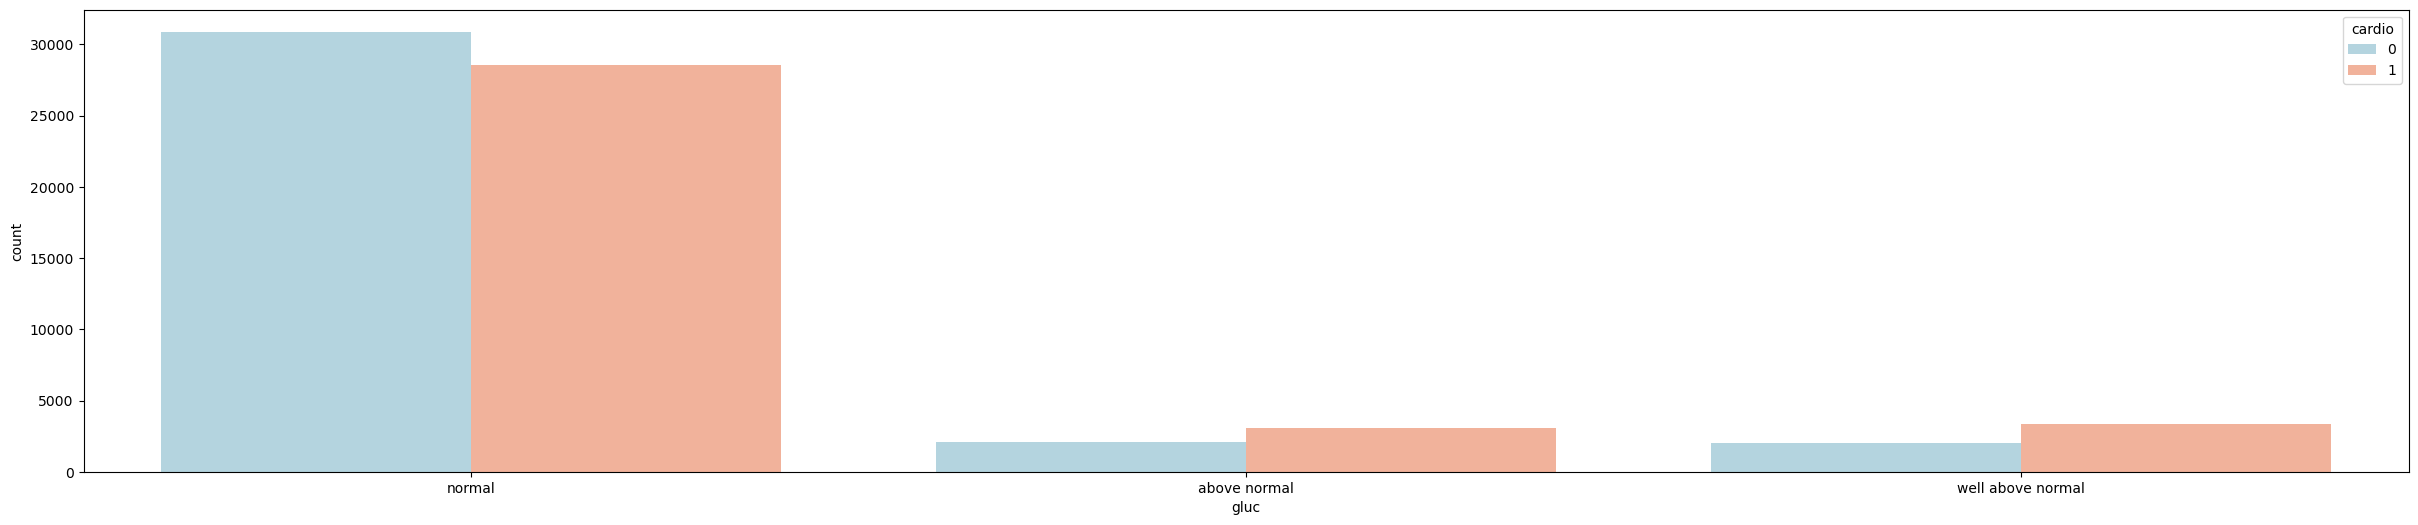

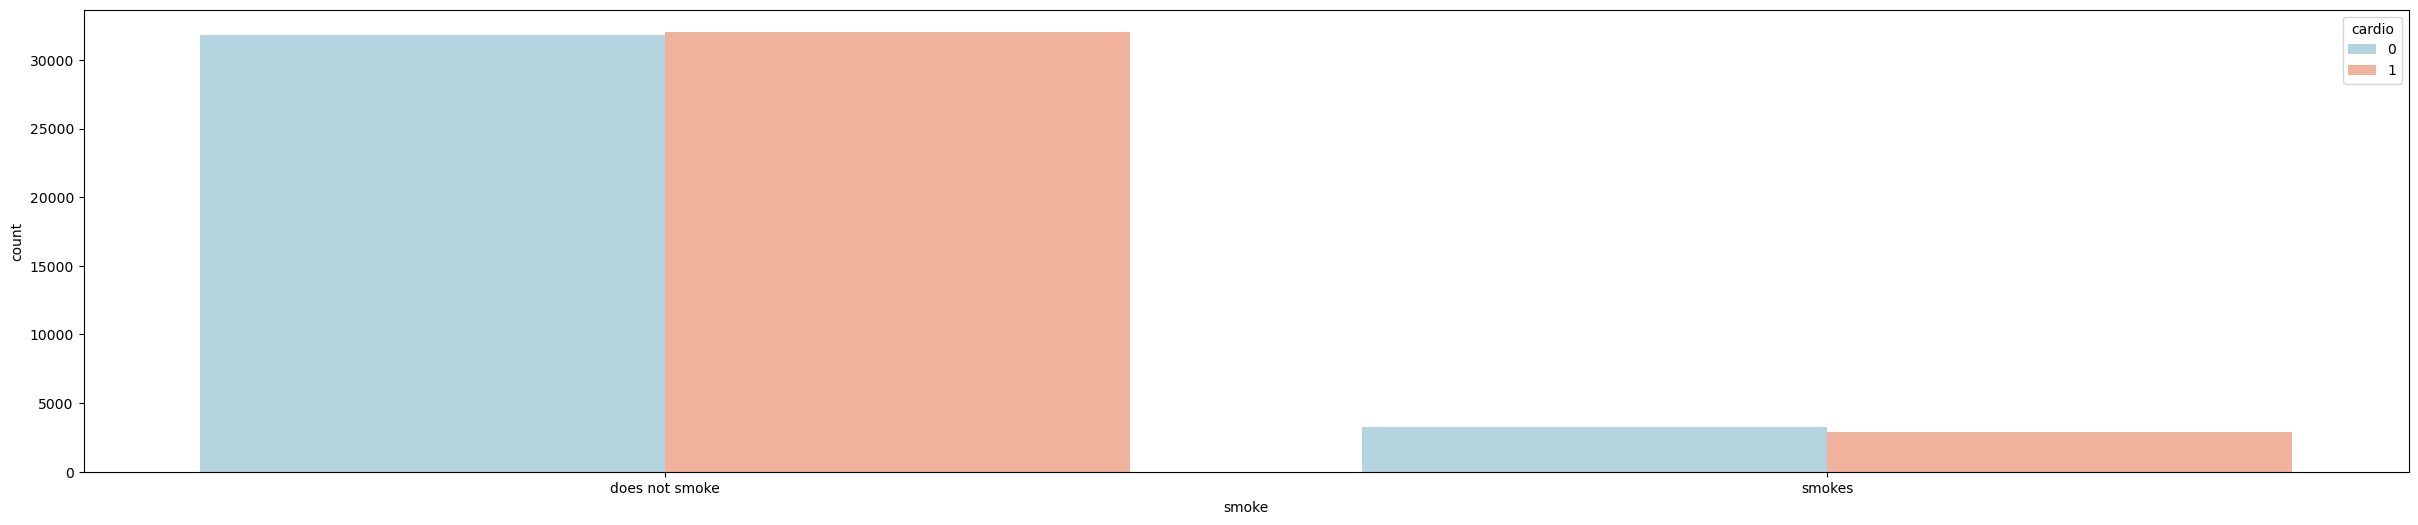

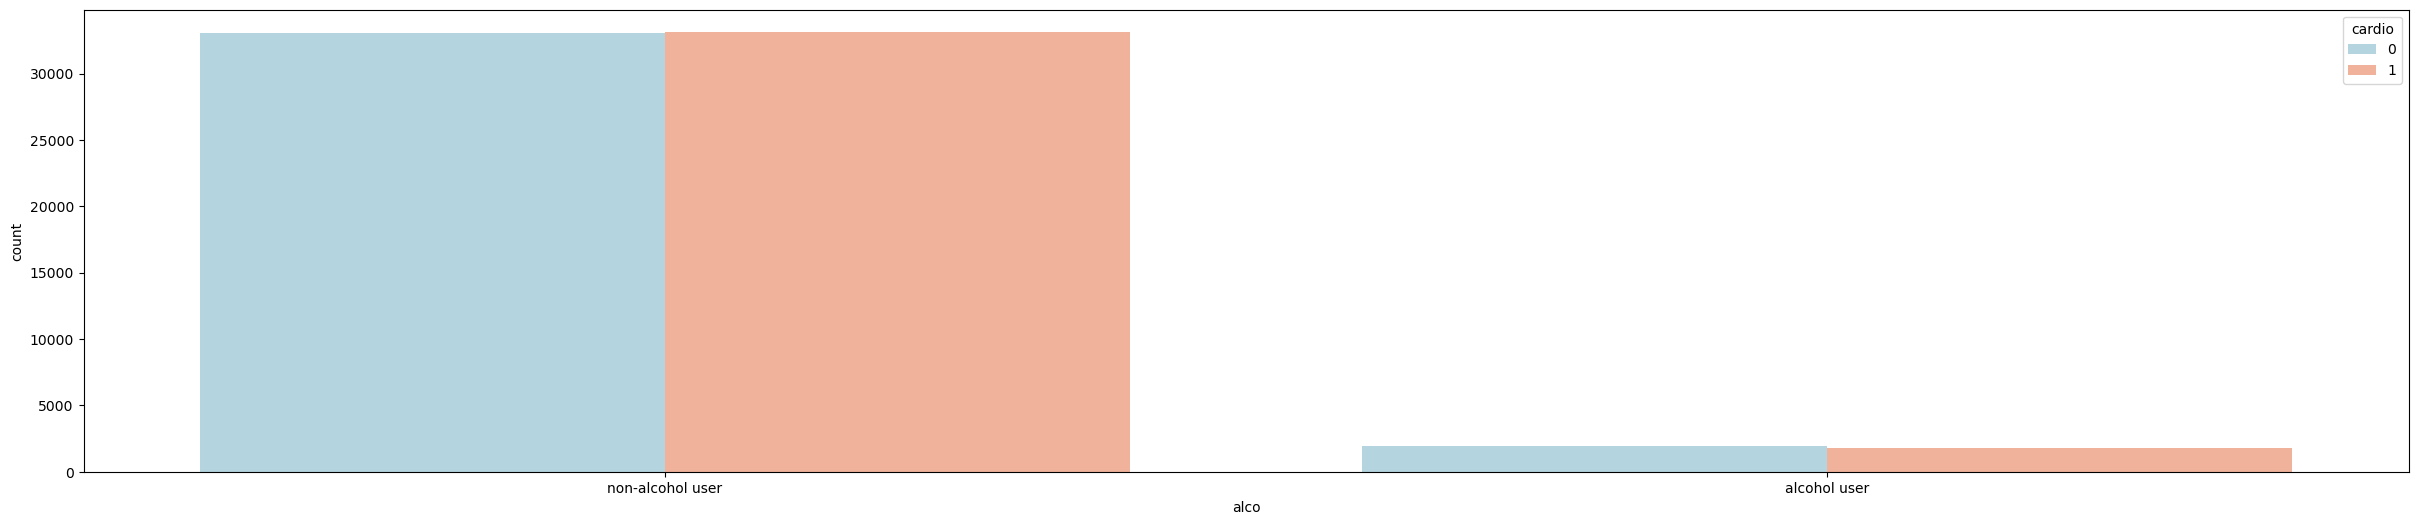

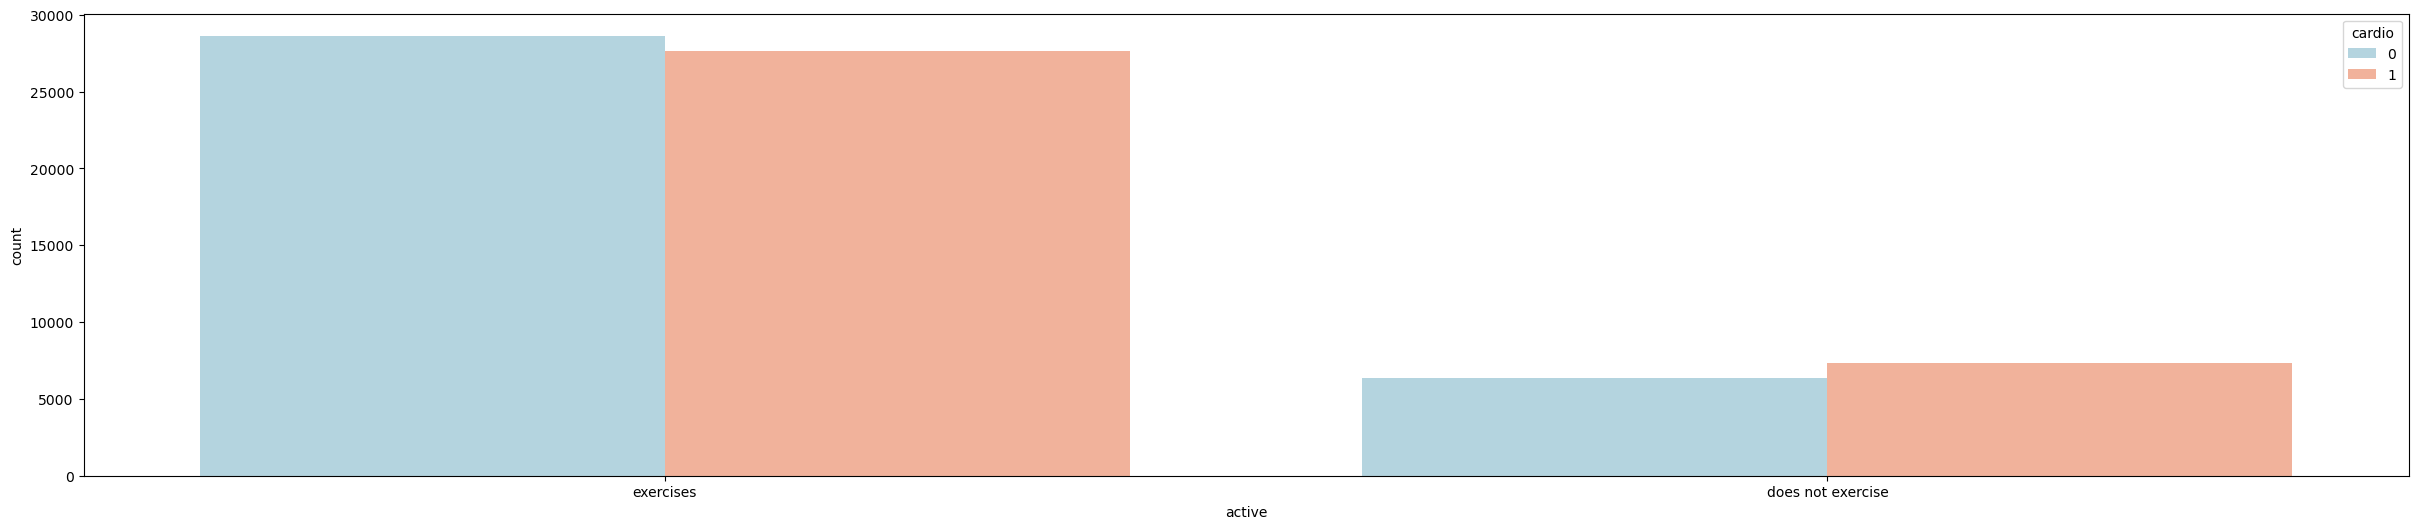

In [13]:
#Count plot for Cate.
gender_name = data['gender'].replace({1: 'Women', 2: 'Men'})
cholesterol_name = data['cholesterol'].replace({1: 'normal',2:'above normal',3:'well above normal'})
gluc_name = data['gluc'].replace({1: 'normal',2:'above normal',3:'well above normal'})
smoke_name = data['smoke'].replace({0:'does not smoke',1:'smokes'})
alco_name = data['alco'].replace({0:'non-alcohol user',1:'alcohol user'})
active_name = data['active'].replace({0:'does not exercise',1:'exercises'})

columns=[gender_name,cholesterol_name,gluc_name,smoke_name,alco_name,active_name]
for col in columns:
    plt.figure(figsize=(30, 6))
    sns.countplot(x=col,data=data,hue='cardio',palette=["#ADD8E6","#ffab8d"])
   
plt.show()

# Boxplot for Cont. Features (Showing Outliers)

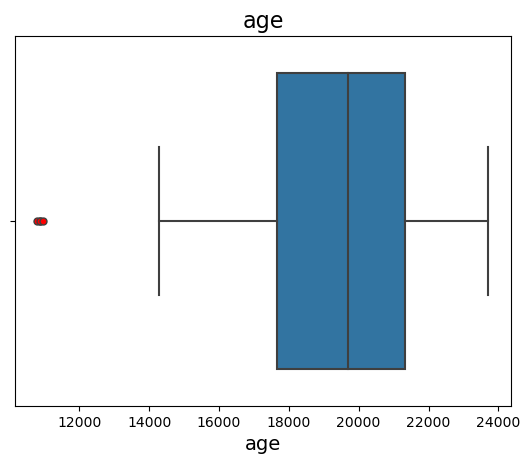

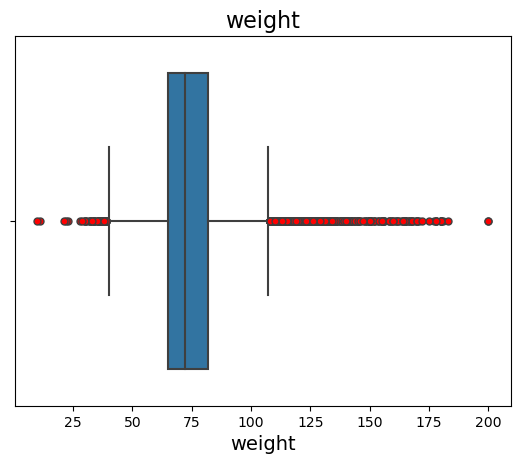

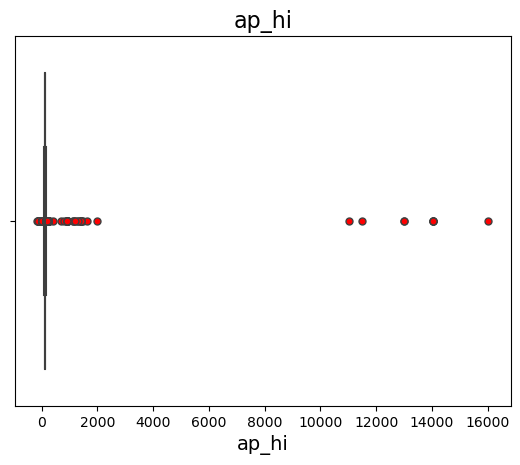

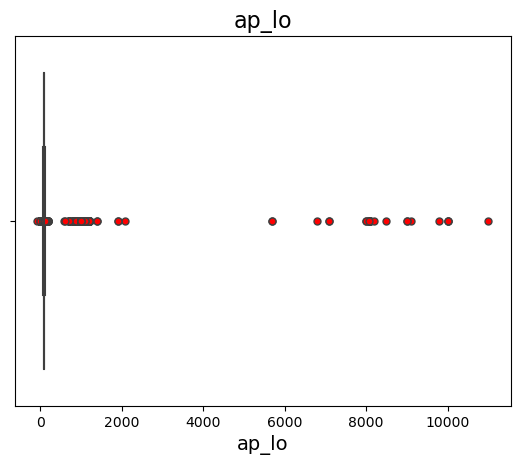

In [14]:
warnings.filterwarnings("ignore", category=FutureWarning)
#Creating Boxplot to show outliers for Cont.Features
import matplotlib.pyplot as plt
import pandas as pd


conticolumns=data[['age','weight','ap_hi','ap_lo']]


for col in conticolumns:
    fig, bp = plt.subplots()
    sns.boxplot(data[col],flierprops={'markerfacecolor': 'red', 'marker': 'o'})
    bp.set_title(col,fontsize=16)
    bp.set_xlabel(col,fontsize=14)

    plt.show()




# Coorrelation of Continuous Features of a Data Before Imputation

Seperating for categorical and continuous feature is essential as the corr() function in pandas uses Pearson Co-efficient to calculate co-efficient

In [15]:
cont_matrix = data[["age","height","weight","ap_hi","ap_lo","cardio"]].corr().round(2)
display(cont_matrix[["cardio"]])
coor = cont_matrix[["cardio"]]
co_or = coor

,cardio
age,0.24
height,-0.01
weight,0.18
ap_hi,0.05
ap_lo,0.07
cardio,1.00


# Coorrelation of Binary Features of a Data Before Imputation

In [10]:
# Function for Tetrachoric Correlation 
#This is for features having binary value
def Tetrachoric_corr(a,b,c,d):
    root = np.sqrt((a*d)/(b*c))
    return np.cos(np.pi/(1+root))

In [17]:
print("For gender")
gender_corr = data[['gender', 'cardio']].value_counts().reset_index(name='count')
display(gender_corr)
print("For smoke")
smoke_corr = data[['smoke', 'cardio']].value_counts().reset_index(name='count')
display(smoke_corr)
print("For alcohol")
alc_corr = data[['alco', 'cardio']].value_counts().reset_index(name='count')
display(alc_corr)
print("For active")
act_corr = data[['active', 'cardio']].value_counts().reset_index(name='count')
display(act_corr)

For gender


,gender,cardio,count
0,1,0,22914
1,1,1,22616
2,2,1,12363
3,2,0,12107


For smoke


,smoke,cardio,count
0,0,1,32050
1,0,0,31781
2,1,0,3240
3,1,1,2929


For alcohol


,alco,cardio,count
0,0,1,33156
1,0,0,33080
2,1,0,1941
3,1,1,1823


For active


,active,cardio,count
0,1,0,28643
1,1,1,27618
2,0,1,7361
3,0,0,6378


In [18]:
tcvalues = []
gctc = gender_corr[["count"]].values
tcvalues.append(Tetrachoric_corr(gctc[0],gctc[1],gctc[3],gctc[2])[0])
sctc = smoke_corr[["count"]].values
tcvalues.append(Tetrachoric_corr(sctc[1],sctc[0],sctc[2],sctc[3])[0])
actc = alc_corr[["count"]].values
tcvalues.append(Tetrachoric_corr(gctc[1],gctc[0],gctc[2],gctc[3])[0])
actctc = alc_corr[["count"]].values
tcvalues.append(Tetrachoric_corr(actctc[1],actctc[0],actctc[2],actctc[3])[0])

In [19]:
Index = ["gender","smoke","alco","active"]
tccorr = {'cardio':tcvalues}
temp = pd.DataFrame(tccorr, index=Index)
co_or = pd.concat([coor, temp], ignore_index=False, sort=False)
temp_coor = co_or
display(co_or)

,cardio
age,0.240000
height,-0.010000
weight,0.180000
ap_hi,0.050000
ap_lo,0.070000
cardio,1.000000
gender,0.013357
smoke,-0.042914
alco,-0.013357
active,-0.025526


# Coorrelation of Ordinal Features of a Data Before Removal

,cardio
age,0.240000
height,-0.010000
weight,0.180000
ap_hi,0.050000
ap_lo,0.070000
cardio,1.000000
gender,0.013357
smoke,-0.042914
alco,-0.013357
active,-0.025526


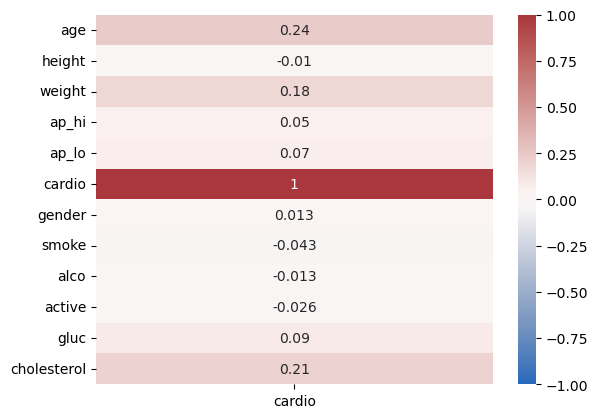

In [20]:
cont_matrix = data[["gluc","cholesterol","cardio"]].corr(method='kendall').round(2)
co_or = pd.concat([temp_coor , cont_matrix[["cardio"]]], ignore_index=False, sort=False).drop_duplicates()
display(co_or)
sns.heatmap(co_or, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag')
plt.show()

# Z-Score Method

In [21]:
# Looking for outliers
# z = (x – μ) / σ
# Right Skewed Distribution: Mode < Median < Mean
# Left Skewed Distribution: Mode > Median > Mean
print("After Removing Outliers using Z-Score")
z_scores = np.abs((data[['age','weight','ap_lo','ap_hi']]-data[['age','weight','ap_lo','ap_hi']].mean()) /data[['age','weight','ap_lo','ap_hi']].std())
new_data = data[(z_scores <3).all(axis=1)] # we are using 3 because its the most common threshold used to identify outliers
new_data

After Removing Outliers using Z-Score


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69994,99992,21074,1,165,80.0,150,80,1,1,0,0,1,1
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


# Boxplot for Cont. Features (After Z Score Method)

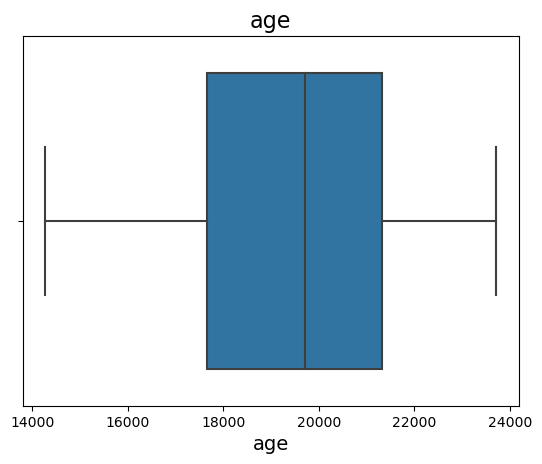

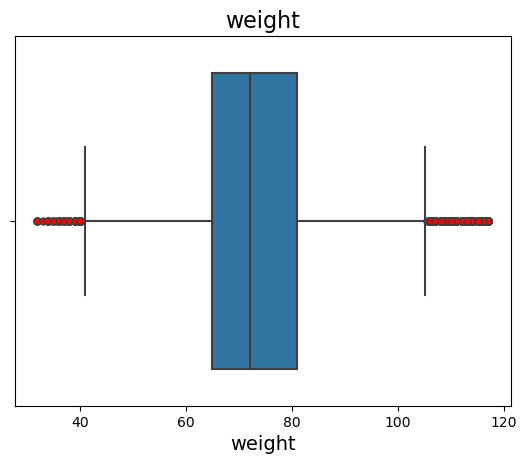

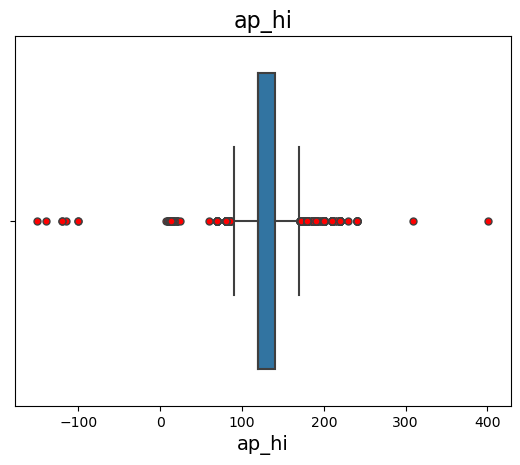

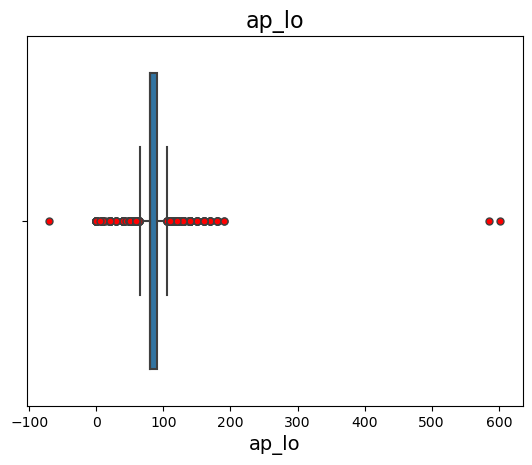

In [22]:
warnings.filterwarnings("ignore", category=FutureWarning)
import matplotlib.pyplot as plt
import pandas as pd


conticolumns=new_data[['age','weight','ap_hi','ap_lo']]


for col in conticolumns:
    fig, bp = plt.subplots()
    sns.boxplot(new_data[col],flierprops={'markerfacecolor': 'red', 'marker': 'o'})
    bp.set_title(col,fontsize=16)
    bp.set_xlabel(col,fontsize=14)

    plt.show()

# Looking for Outlier using IQR

In [23]:
print("Determining Outliers using IQR")
#for ap_lo 
def outlier_detect_iqr(array):
    for i in array:()
    q75, q25 = np.percentile(data[i], [75 ,25])
    iqr = q75 - q25
    higher_limit = iqr + q75
    lower_limit = q25 - iqr
    display(data[(data[i] > higher_limit) | (data[i] < lower_limit)])
        
cont_col = ['height','weight','ap_lo','ap_hi']
outlier_detect_iqr(cont_col)

Determining Outliers using IQR


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
44,59,19764,1,154,50.0,170,80,3,1,0,0,1,1
56,71,17407,1,171,76.0,90,60,1,2,0,0,1,0
59,74,20431,1,164,64.0,180,90,1,1,1,0,1,1
61,79,20960,2,165,75.0,180,90,3,1,0,0,1,1
101,136,18718,1,167,80.0,190,90,2,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69937,99908,14489,1,160,53.0,90,60,1,1,0,0,1,0
69949,99932,22119,1,167,68.0,167,85,3,1,0,0,1,1
69978,99967,18800,1,163,78.0,90,60,1,1,0,0,1,1
69992,99990,18792,1,161,56.0,170,90,1,1,0,0,1,1


# Looking for Outliers using Mean,Deviation

In [24]:
def outlier_detect_m_d(array):
    for i in array:
        higher_limit = data[i].mean() + 2*data[i].std() 
        lower_limit = data[i].mean() - 2*data[i].std() 
        display(data[(data[i] > higher_limit) | (data[i] < lower_limit)])
cont_col = ['height','weight','ap_lo','ap_hi']
outlier_detect_m_d(cont_col)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
14,23,14532,2,181,95.0,130,90,1,1,1,1,1,0
62,81,20330,2,187,115.0,130,90,1,1,0,1,1,0
76,105,20397,2,188,105.0,120,80,1,1,0,0,1,1
94,127,15946,2,185,88.0,133,89,2,3,0,0,1,0
103,138,18128,2,183,95.0,125,80,1,3,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69913,99862,18748,2,186,101.0,110,80,3,1,0,0,1,0
69934,99901,15843,1,143,70.0,120,90,2,1,0,0,1,1
69975,99963,21264,2,182,100.0,120,80,1,1,0,0,1,1
69981,99972,17500,2,182,110.0,130,90,2,2,0,0,1,1


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
15,24,16782,2,172,112.0,120,80,1,1,0,0,0,1
23,33,23376,2,156,45.0,110,60,1,1,0,0,1,0
30,42,18291,1,155,105.0,120,80,3,1,0,0,1,1
46,61,18207,1,162,107.0,150,90,2,1,0,0,1,1
62,81,20330,2,187,115.0,130,90,1,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69947,99930,23305,2,172,113.0,110,80,1,1,0,0,0,1
69970,99958,22572,2,173,103.0,140,80,3,1,1,1,0,1
69981,99972,17500,2,182,110.0,130,90,2,2,0,0,1,1
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
228,314,17489,2,183,98.0,160,1100,1,2,1,0,1,1
241,334,21932,2,157,60.0,160,1000,2,1,0,0,0,1
260,357,18217,1,150,83.0,140,800,1,1,0,0,1,1
329,458,23407,1,176,63.0,160,1000,2,2,0,0,0,1
345,482,18704,1,154,81.0,140,1000,2,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69771,99659,23330,1,167,81.0,160,1000,1,1,0,0,1,1
69872,99798,21808,1,152,56.0,160,1000,1,1,0,0,1,1
69878,99807,21239,2,168,95.0,160,1000,1,1,0,0,1,1
69885,99816,22417,2,166,78.0,170,1000,1,1,0,0,0,0


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
1876,2654,15116,1,160,60.0,902,60,1,1,0,0,1,0
2014,2845,22712,2,167,59.0,906,0,1,1,0,0,1,0
4817,6822,14425,1,168,63.0,909,60,2,1,0,0,1,0
7763,11089,21032,1,175,80.0,11500,90,1,1,0,0,1,1
8915,12710,18870,1,164,75.0,1420,80,2,1,0,0,1,1
9557,13616,22659,1,155,87.0,701,110,1,1,0,0,1,1
13895,19827,15996,1,168,72.0,1500,80,1,1,0,0,1,1
17713,25314,22398,2,163,50.0,907,70,3,3,0,0,1,1
23867,34120,16131,1,161,92.0,906,0,2,1,0,0,1,1
25464,36339,15835,2,169,75.0,14020,80,2,1,0,0,1,1


# Imputing Outliers using Mean,Deviation

In [25]:
new_data_md = data
def outlier_detect_m_d(feature, new_data_md):
        higher_limit = new_data_md[feature].mean() + 2* new_data_md[feature].std() 
        lower_limit = new_data_md[feature].mean() - 2* new_data_md[feature].std() 
        return new_data_md[(new_data_md[feature] > higher_limit) | (new_data_md[feature] < lower_limit)]
cont_col = ['height','weight','ap_lo','ap_hi']
for i in cont_col:
    new_data_md = pd.concat([new_data_md, outlier_detect_m_d(i,data), outlier_detect_m_d(i,data)]).drop_duplicates(keep=False)
display(new_data_md)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69993,99991,19699,1,172,70.0,130,90,1,1,0,0,1,1
69994,99992,21074,1,165,80.0,150,80,1,1,0,0,1,1
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


# BoxPlot For Continuous Feature(After Using Mean,Deviation) 

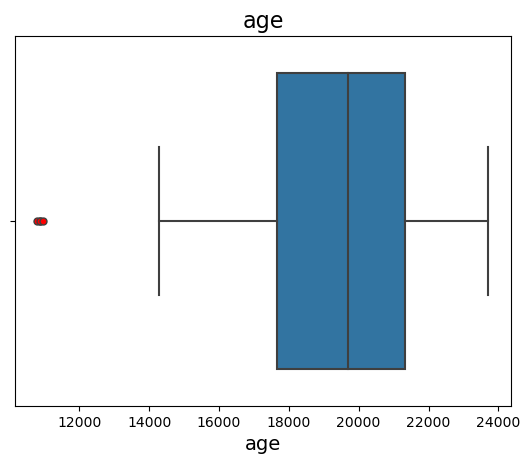

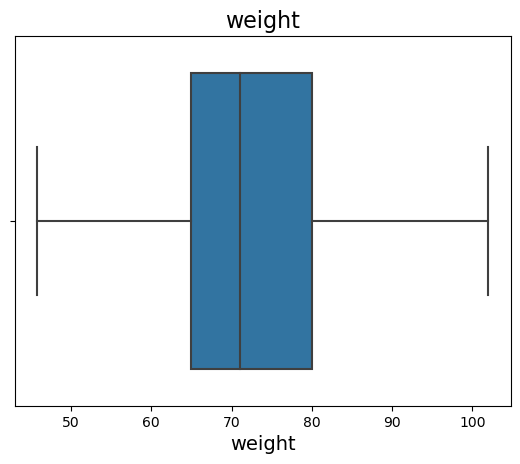

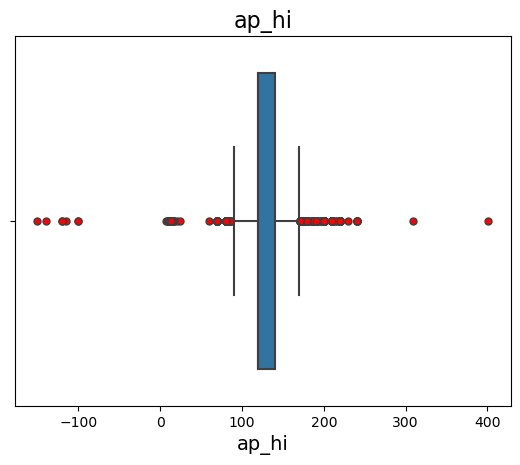

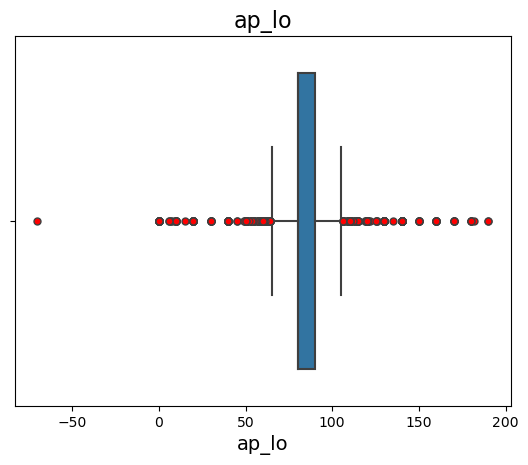

In [26]:
warnings.filterwarnings("ignore", category=FutureWarning)
import matplotlib.pyplot as plt
import pandas as pd


conticolumns=new_data_md[['age','weight','ap_hi','ap_lo']]


for col in conticolumns:
    fig, bp = plt.subplots()
    sns.boxplot(new_data_md[col],flierprops={'markerfacecolor': 'red', 'marker': 'o'})
    bp.set_title(col,fontsize=16)
    bp.set_xlabel(col,fontsize=14)

    plt.show()

# Imputing Outliers using IQR

In [4]:
new_data_iqr = data
def outlier_detect_iqr(feature, new_data_md):
    q75, q25 = np.percentile(new_data_md[feature], [75 ,25])
    iqr = q75 - q25
    higher_limit = iqr + q75
    lower_limit = q25 - iqr
    return new_data_md[(new_data_md[feature] > higher_limit) | (new_data_md[feature] < lower_limit)]
cont_col = ['height','weight','ap_lo','ap_hi']
for i in cont_col:
    new_data_iqr = pd.concat([new_data_iqr, outlier_detect_iqr(i,data), outlier_detect_iqr(i,data)]).drop_duplicates(keep=False)
display(new_data_iqr)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
5,8,21914,1,151,67.0,120,80,2,2,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69993,99991,19699,1,172,70.0,130,90,1,1,0,0,1,1
69994,99992,21074,1,165,80.0,150,80,1,1,0,0,1,1
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


# BoxPlot For Continuous Feature(After Using IQR)

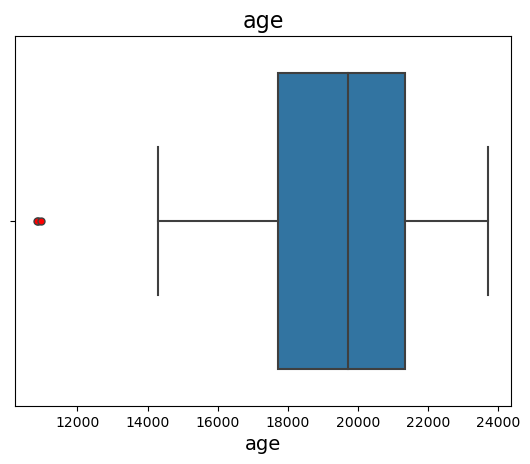

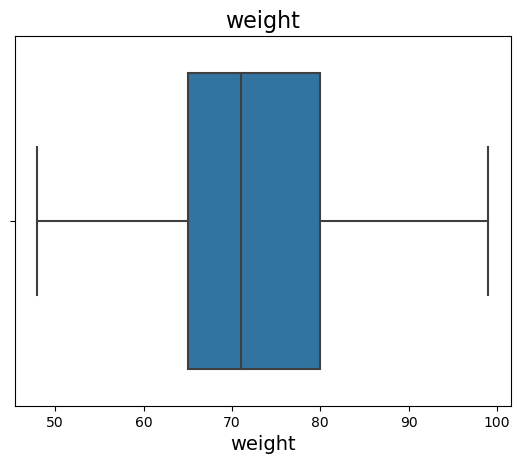

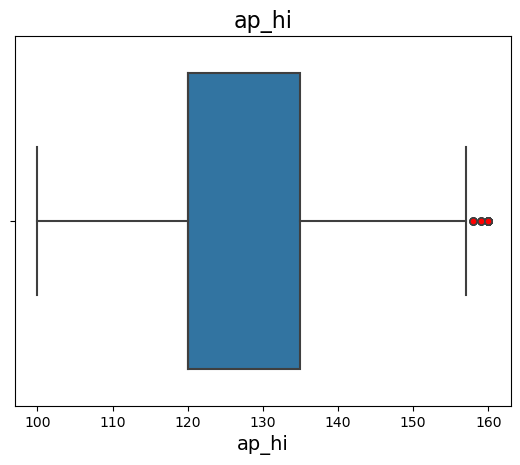

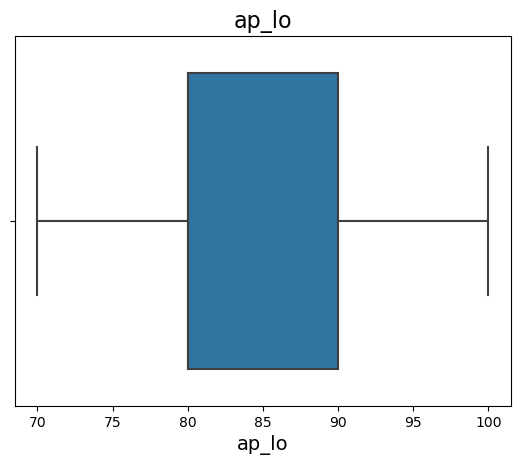

In [28]:
warnings.filterwarnings("ignore", category=FutureWarning)
import matplotlib.pyplot as plt
import pandas as pd


conticolumns=new_data_iqr[['age','weight','ap_hi','ap_lo']]


for col in conticolumns:
    fig, bp = plt.subplots()
    sns.boxplot(new_data_iqr[col],flierprops={'markerfacecolor': 'red', 'marker': 'o'})
    bp.set_title(col,fontsize=16)
    bp.set_xlabel(col,fontsize=14)

    plt.show()

# Final Removal using IQR

In [27]:
final_data = data
cont_col = ['weight','ap_lo','ap_hi']
for i in cont_col:
    final_data = pd.concat([final_data, outlier_detect_iqr(i,data), outlier_detect_iqr(i,data)]).drop_duplicates(keep=False)
display(final_data)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
5,8,21914,1,151,67.0,120,80,2,2,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69993,99991,19699,1,172,70.0,130,90,1,1,0,0,1,1
69994,99992,21074,1,165,80.0,150,80,1,1,0,0,1,1
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


# Boxplot after all outlier removal

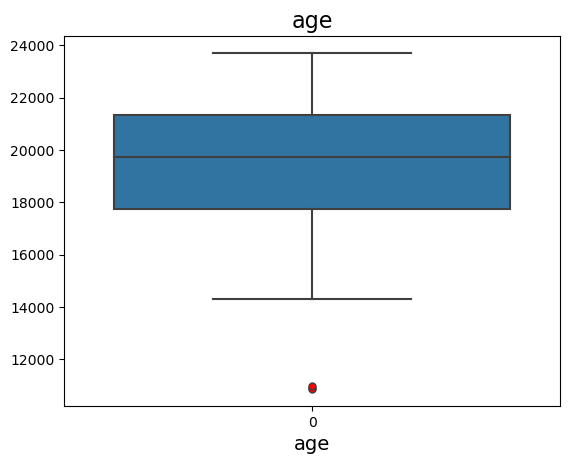

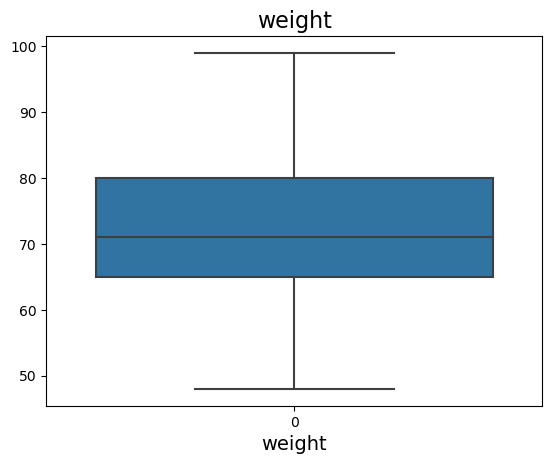

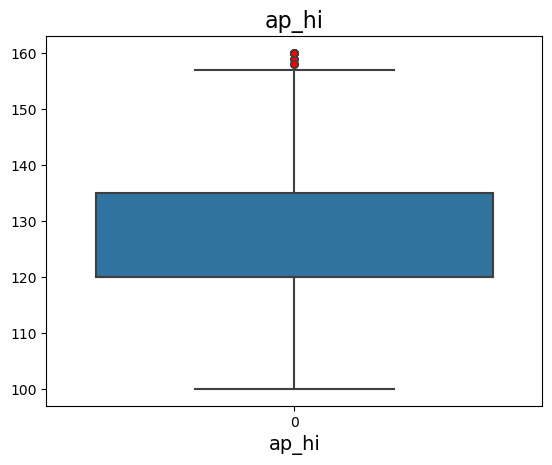

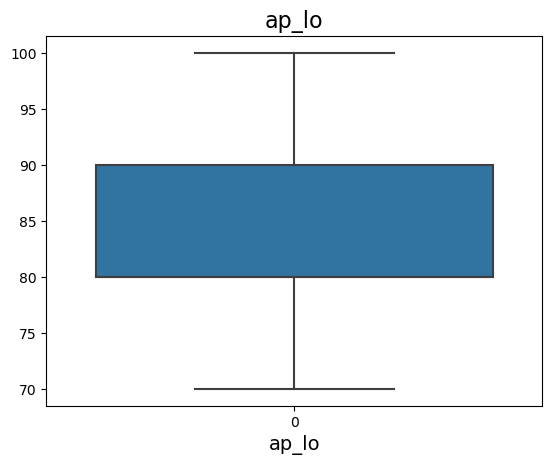

In [28]:
warnings.filterwarnings("ignore", category=FutureWarning)
import matplotlib.pyplot as plt
import pandas as pd


conticolumns=final_data[['age','weight','ap_hi','ap_lo']]


for col in conticolumns:
    fig, bp = plt.subplots()
    sns.boxplot(final_data[col],flierprops={'markerfacecolor': 'red', 'marker': 'o'})
    bp.set_title(col,fontsize=16)
    bp.set_xlabel(col,fontsize=14)

    plt.show()

# Co orelation Matrix of Continuous feature after imputing data 

In [29]:
matrix_iqr = final_data[["age","height","weight","ap_hi","ap_lo","cardio"]].corr().round(2)[["cardio"]]

# Co orelation Matrix of Binary feature after imputing data

In [30]:
print("For gender")
gender_corr = final_data[['gender', 'cardio']].value_counts().reset_index(name='count')
display(gender_corr)
print("For smoke")
smoke_corr = final_data[['smoke', 'cardio']].value_counts().reset_index(name='count')
display(smoke_corr)
print("For alcohol")
alc_corr = final_data[['alco', 'cardio']].value_counts().reset_index(name='count')
display(alc_corr)
print("For active")
act_corr = final_data[['active', 'cardio']].value_counts().reset_index(name='count')
display(act_corr)

For gender


,gender,cardio,count
0,1,0,19741
1,1,1,19114
2,2,0,10779
3,2,1,10019


For smoke


,smoke,cardio,count
0,0,0,27703
1,0,1,26815
2,1,0,2817
3,1,1,2318


For alcohol


,alco,cardio,count
0,0,0,28847
1,0,1,27742
2,1,0,1673
3,1,1,1391


For active


,active,cardio,count
0,1,0,24988
1,1,1,22997
2,0,1,6136
3,0,0,5532


In [31]:
tcvalues = []
gctc = gender_corr[["count"]].values
tcvalues.append(Tetrachoric_corr(gctc[0],gctc[1],gctc[3],gctc[2])[0])
sctc = smoke_corr[["count"]].values
tcvalues.append(Tetrachoric_corr(sctc[1],sctc[0],sctc[2],sctc[3])[0])
actc = alc_corr[["count"]].values
tcvalues.append(Tetrachoric_corr(gctc[1],gctc[0],gctc[2],gctc[3])[0])
actctc = alc_corr[["count"]].values
tcvalues.append(Tetrachoric_corr(actctc[1],actctc[0],actctc[2],actctc[3])[0])

In [32]:
Index = ["gender","smoke","alco","active"]
tccorr = {'cardio':tcvalues}
temp = pd.DataFrame(tccorr, index=Index)
co_or = pd.concat([matrix_iqr, temp], ignore_index=False, sort=False)
temp_coor = co_or
display(co_or)

,cardio
age,0.240000
height,-0.040000
weight,0.140000
ap_hi,0.430000
ap_lo,0.330000
cardio,1.000000
gender,0.041366
smoke,-0.089143
alco,-0.041366
active,-0.087625


 # Coorrelation of Ordinal Features of a Data After Removal

,cardio
age,0.240000
height,-0.040000
weight,0.140000
ap_hi,0.430000
ap_lo,0.330000
cardio,1.000000
gender,0.041366
smoke,-0.089143
alco,-0.041366
active,-0.087625


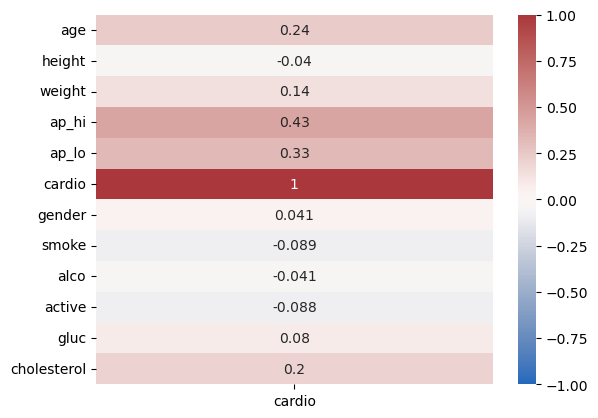

In [20]:
cont_matrix = final_data[["gluc","cholesterol","cardio"]].corr(method='kendall').round(2)
co_or = pd.concat([temp_coor , cont_matrix[["cardio"]]], ignore_index=False, sort=False).drop_duplicates()
display(co_or)
sns.heatmap(co_or, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag')
plt.show()

# Density Plot for Cont. Features after removing outliers

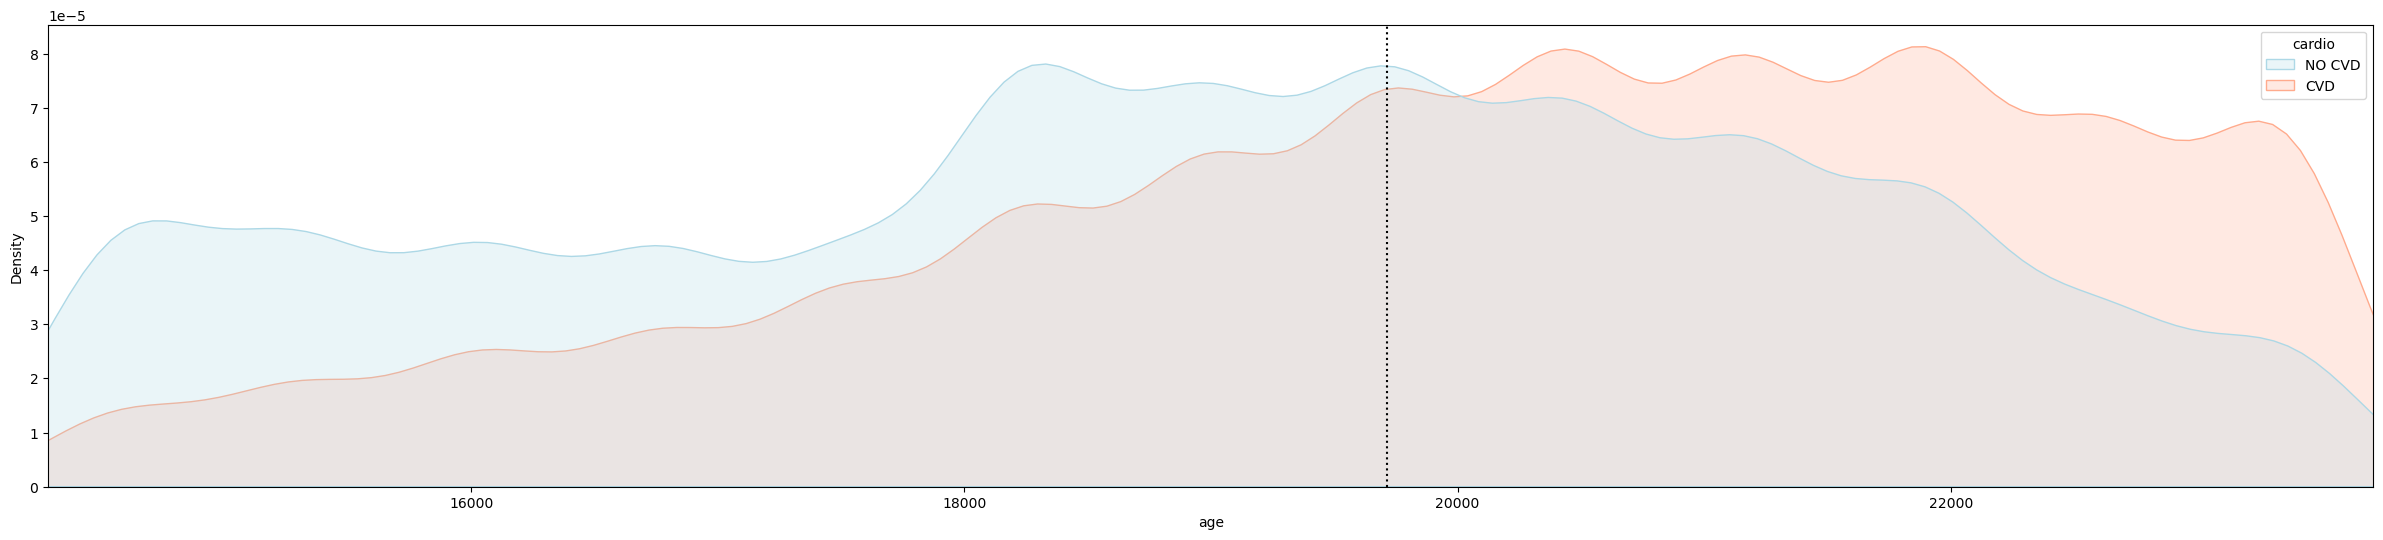

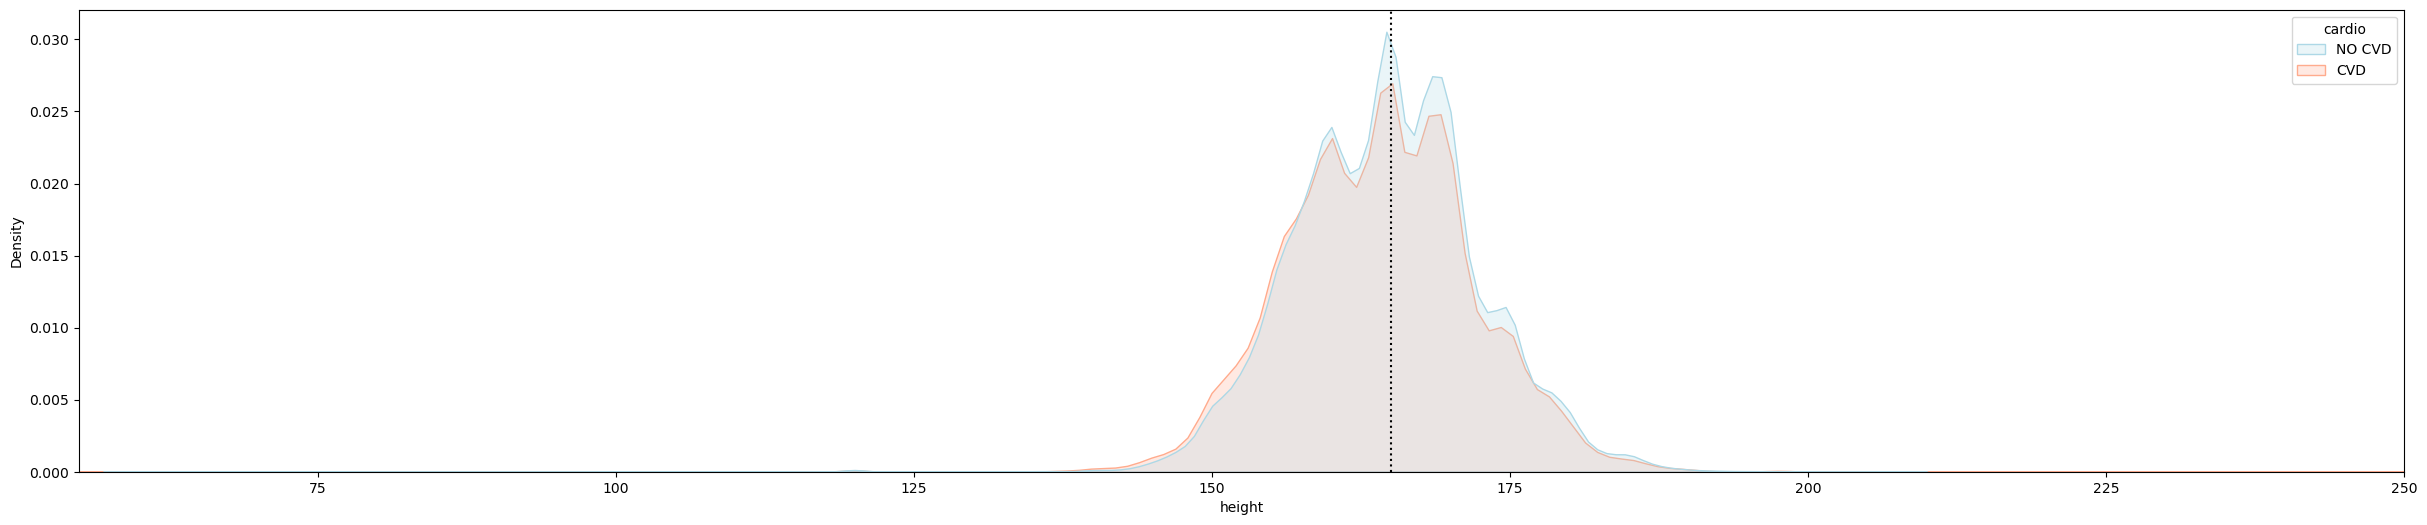

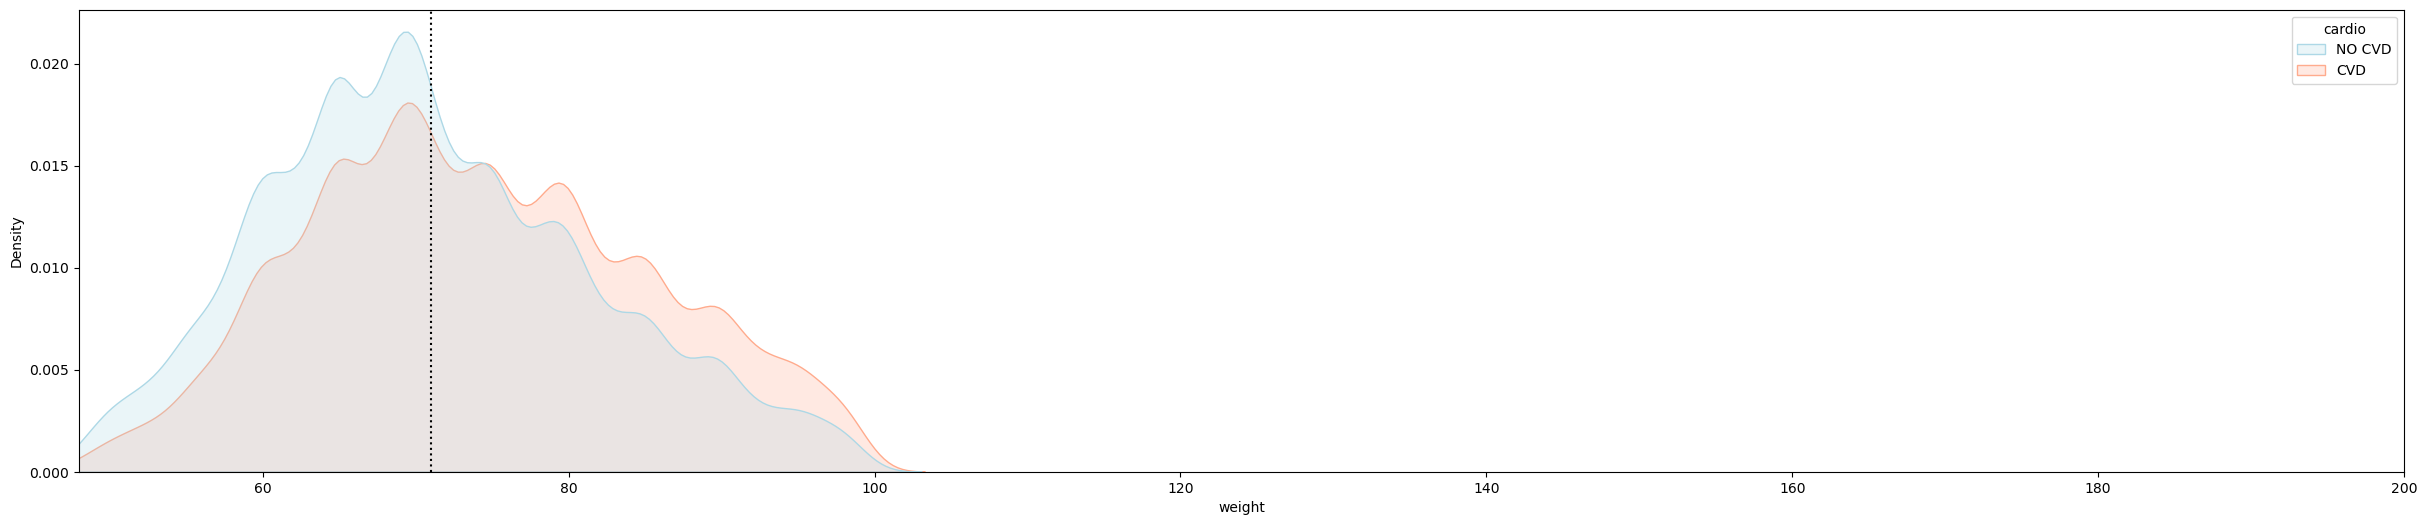

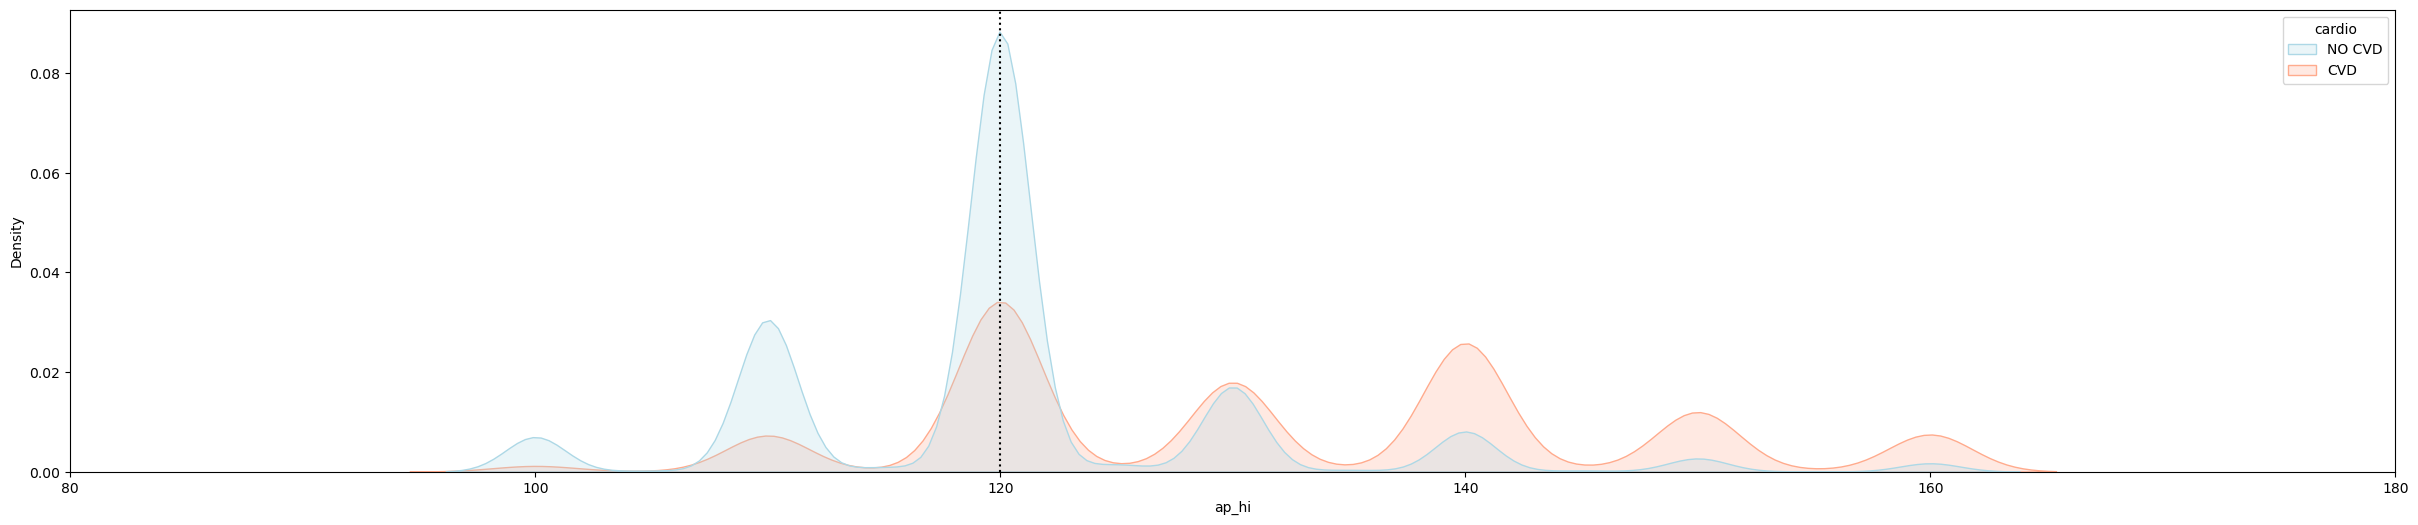

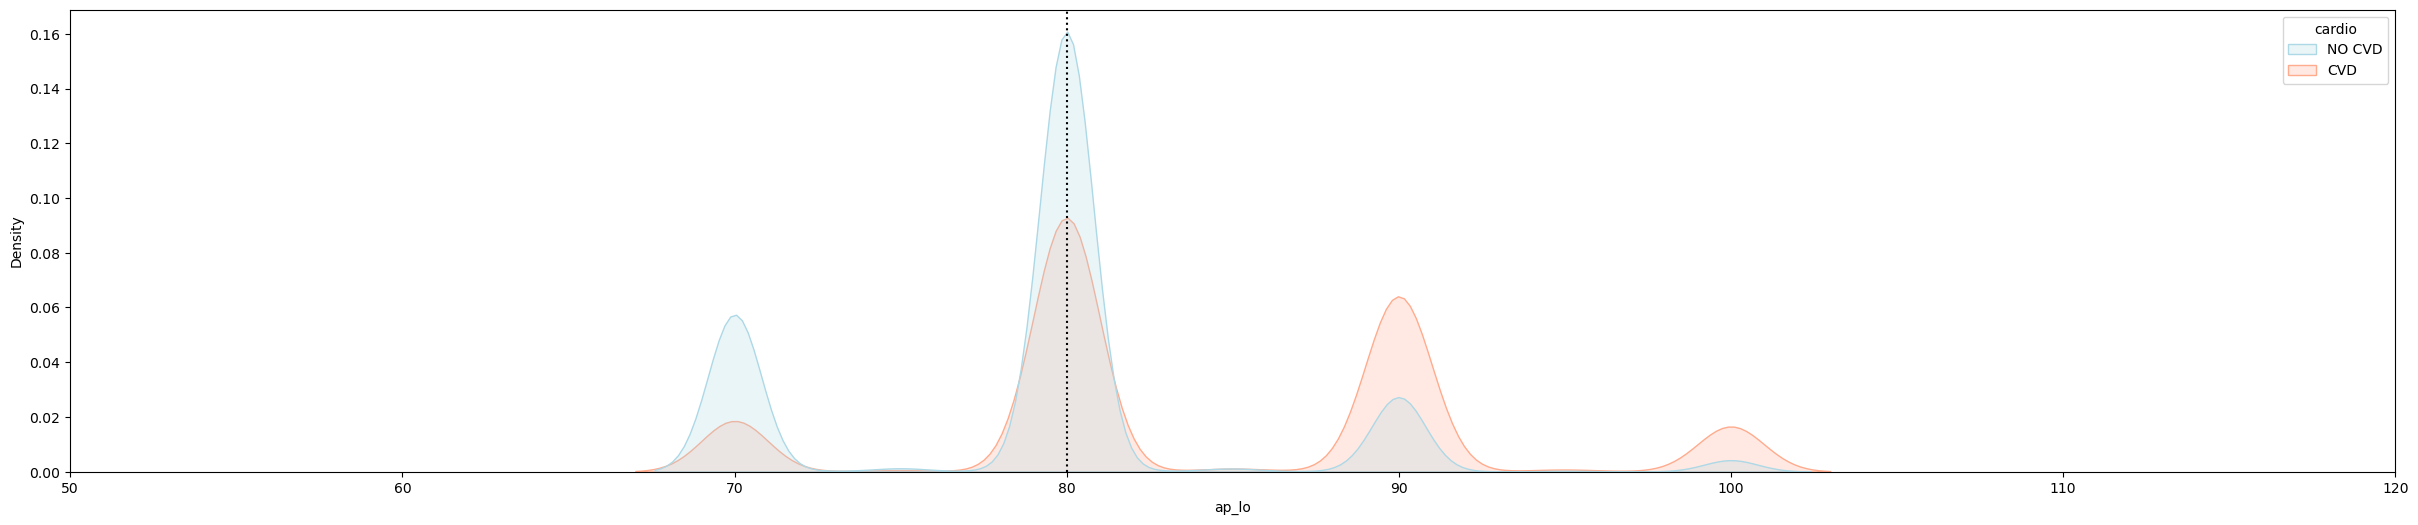

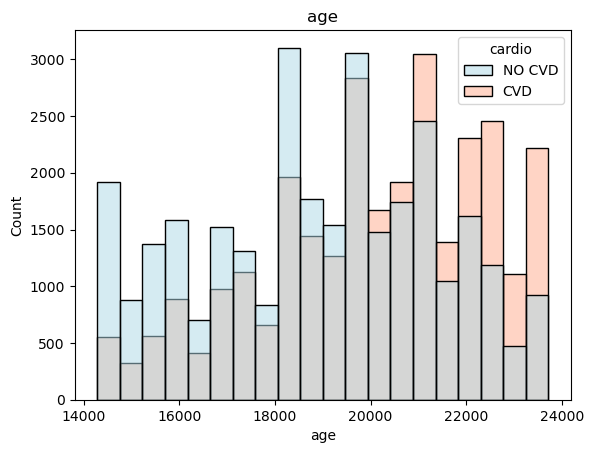

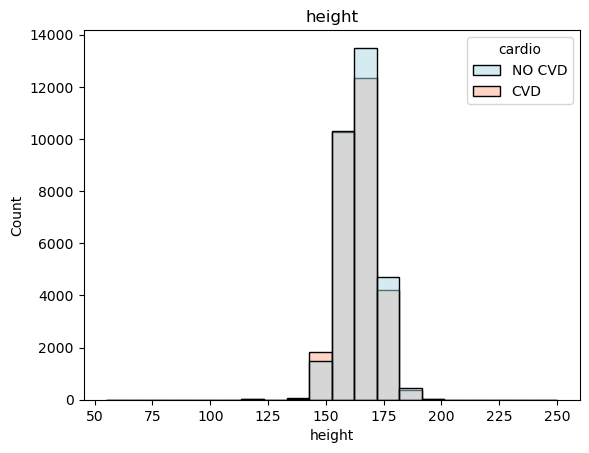

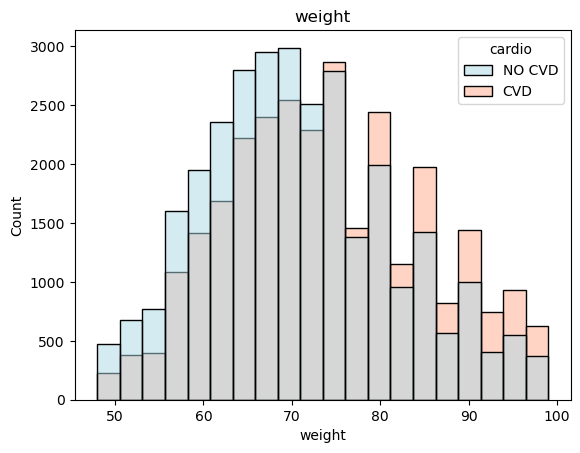

In [36]:
cardio=final_data['cardio'].replace({0: 'NO CVD', 1: 'CVD'})

conticolumns=final_data[['age','height','weight']]



for colu in conticolumns:
    
    plt.figure(figsize=(30, 6))
    
   
    sns.kdeplot(final_data[colu], hue=cardio, fill=True,palette=["#ADD8E6","#ffab8d"],label=colu)
    median_value = final_data[colu].median()
   
    plt.axvline(median_value, color='black', linestyle=':')
    plt.xlim(final_data[colu].min(), data[colu].max())
    plt.show()

plt.figure(figsize=(30, 6))
    
   
sns.kdeplot(final_data["ap_hi"], hue=cardio, fill=True,palette=["#ADD8E6","#ffab8d"],label='ap_hi')
median_value = final_data["ap_hi"].median()
   
plt.axvline(median_value, color='black', linestyle=':')
plt.xlim(80,180)
plt.show() 

plt.figure(figsize=(30, 6))
    
   
sns.kdeplot(final_data["ap_lo"], hue=cardio, fill=True,palette=["#ADD8E6","#ffab8d"],label='ap_lo')
median_value = final_data["ap_lo"].median()
   
plt.axvline(median_value, color='black', linestyle=':')
plt.xlim(50,120)
plt.show() 


num_bins = 20


for col in conticolumns:
    plt.figure()
    sns.histplot(data=final_data, x=col, bins=num_bins,palette=["#ADD8E6","#ffab8d"], hue=cardio)
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.title(col)
    


plt.show()



# SCATTER PLOT FOR HEIGHT/WEIGHT

<AxesSubplot:xlabel='age', ylabel='weight'>

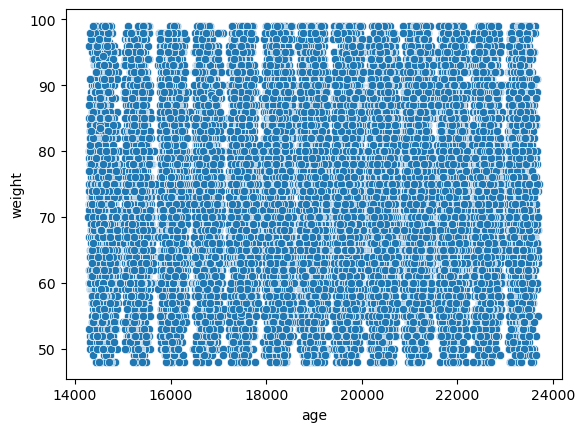

In [37]:
sns.scatterplot(data=final_data, x="age", y="weight")

# SCATTER PLOT FOR AP HI / AP LO

<AxesSubplot:xlabel='ap_hi', ylabel='ap_lo'>

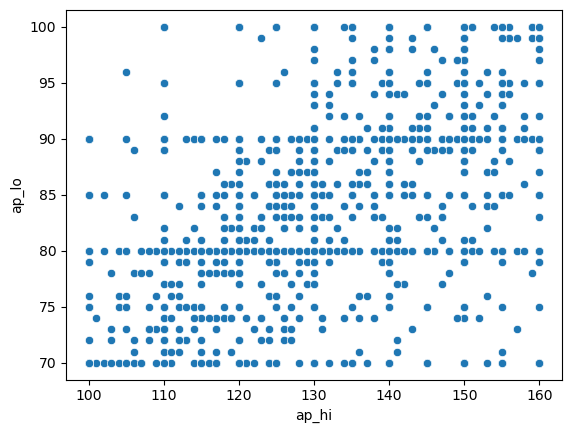

In [38]:
sns.scatterplot(data=final_data, x="ap_hi", y="ap_lo")

# Data Quality Report for Cont. Features after removing Outliers

In [39]:
# DATA QUALITY REPORT FOR CONT. FEATURES

data_quality_cont = final_data[["age","height","weight","ap_hi","ap_lo"]].describe().T


# % of Missing Column
print("Data Quality Report for Cont. Features")
col_name = ["age","height","weight","ap_hi","ap_lo"]
percmiss = []
for col_name in col_name :
    percmiss.append((final_data[col_name].isnull().sum()/len(final_data[col_name]))*100)
data_quality_cont["% of Missing"] = percmiss
data_quality_cont = data_quality_cont.rename(columns={'50%': 'Median', '25%': 'Q1','75%':'Q3'})
data_quality_cont


Data Quality Report for Cont. Features


,count,mean,std,min,Q1,Median,Q3,max,% of Missing
age,59650.0,19489.097100,2455.424862,14284.0,17729.0,19714.0,21334.0,23713.0,0.0
height,59650.0,164.355423,7.951731,55.0,159.0,165.0,170.0,250.0,0.0
weight,59650.0,72.490052,11.072357,48.0,65.0,71.0,80.0,99.0,0.0
ap_hi,59650.0,125.998910,13.534718,100.0,120.0,120.0,135.0,160.0,0.0
ap_lo,59650.0,81.582515,7.491322,70.0,80.0,80.0,90.0,100.0,0.0


# Data Quality Report for Catg. Features after removing Outliers

In [40]:
# DATA QUALITY REPORT FOR CATG. FEATURES
data_quality_catg = final_data[["gender","cholesterol","gluc","smoke","alco","active"]].astype('object').describe().T
print("Data Quality Report for Categ. Features")
data_quality_catg

Data Quality Report for Categ. Features


,count,unique,top,freq
gender,59650,2,1,38852
cholesterol,59650,3,1,45397
gluc,59650,3,1,51173
smoke,59650,2,0,54515
alco,59650,2,0,56586
active,59650,2,1,47982


# Training and Testing Sets with an 80/20 split 

In [41]:
# Creating our training and testing set for our algorithms (80/20 split)
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay # To display diagram of Confusion Matrix
from sklearn.metrics import accuracy_score,recall_score,confusion_matrix,precision_score # importations of metrics
final_data = final_data.reset_index(drop=True) 


X = final_data.drop(['id'], axis=1,inplace=True) # dropping ID since it is not needed
X = final_data.drop(['cardio'], axis=1)
y=final_data["cardio"] # target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # 20% of data will be used for testing

#  Using GridSearchCV to find an optimal n_estimators for Random Forest

In [42]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
# Parameter Grid for Grid Search, since our data is big we decided to use a range between 100 and 105.
param_grid = {'n_estimators': range(100, 105)}

rf = RandomForestClassifier() # first algorithm 

# We are going to use a 5-fold cross-validation
grid_search = GridSearchCV(rf, param_grid, cv=5)
grid_search.fit(X, y)

chosen_n = grid_search.best_params_['n_estimators'] # chosen_n to be set as n_estimators below
print("Best n_estimators based on our data:", chosen_n)

Best n_estimators based on our data: 100


# Random Forest (ML Algorithm #1) & Accuracy, Recall, Precision ,and Confusion Matrix

In [43]:
# Random Forest

rf = RandomForestClassifier(n_estimators=chosen_n, random_state=42) # chose_n from above, 100 is the most optimal
rf.fit(X_train, y_train)                                       

y_actual=y_test
y_pred = rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred) # accuracy score
recall = recall_score(y_test,y_pred) # recall score
precision = precision_score(y_actual, y_pred) # precision score
accuracy,recall,precision = [x * 100 for x in (accuracy,recall,precision)] # converting to percentage
rounded_accuracy = round(accuracy, 2) # nearest hundredth
rounded_recall = round(recall, 2)
rounded_precision= round(precision, 2)
cm1 = confusion_matrix(y_actual, y_pred) # confusion matrix
print("Our Random Forest accuracy",f"{rounded_accuracy}%")
print("Our Random Forest recall",f"{rounded_recall}%")
print("Our Random Forest precision",f"{rounded_precision}%")

rf_accuracy = rounded_accuracy # used for dataframe at the end
rf_recall = rounded_recall # used for dataframe at the end
rf_prec = rounded_precision # used for dataframe at the end

Our Random Forest accuracy 70.49%
Our Random Forest recall 68.31%
Our Random Forest precision 69.61%


# Random Forest Diagram using a Features Importances Plot , a ROC Curve Plot, and a Confusion Matrix Diagram

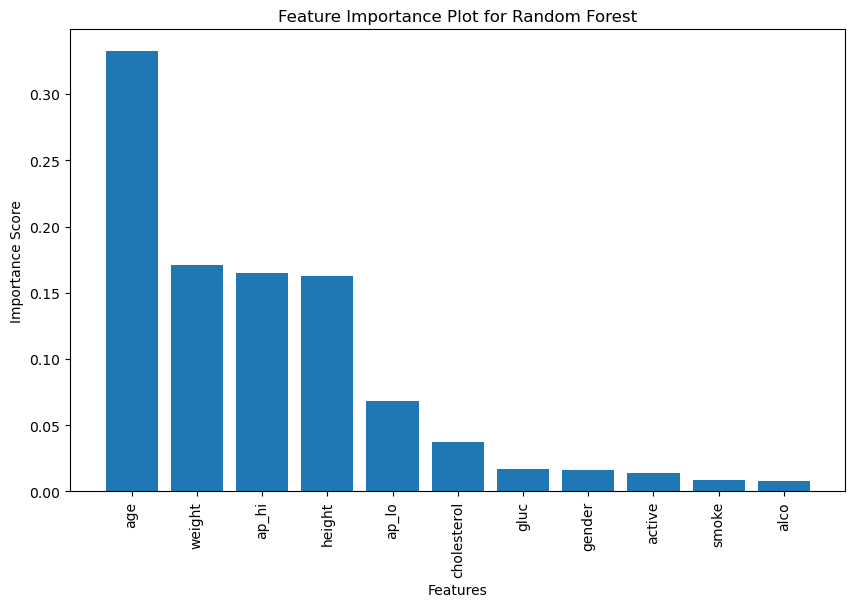

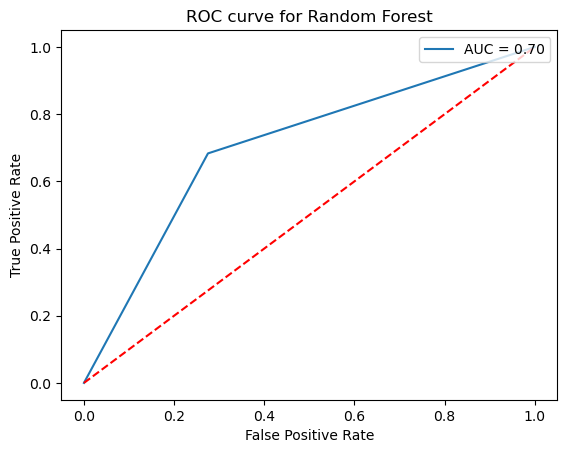

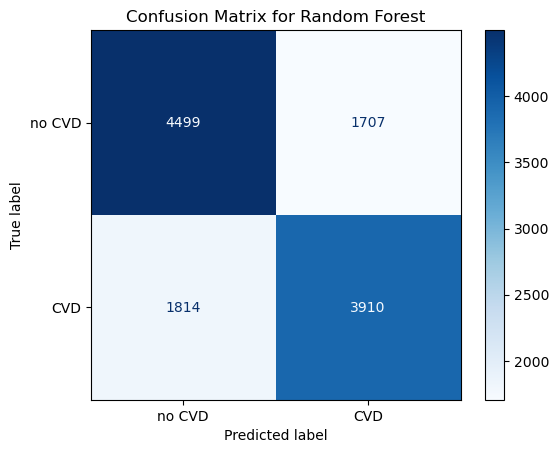

In [44]:
# Feature Importance Plot
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
feature_importance_plot = rf.feature_importances_
sorted_indices = feature_importance_plot.argsort()[::-1] # sorting by highest importance 
feature_importance_features = X.columns # getting names of each feature to be used as x labels below


plt.figure(figsize=(10, 6))
plt.bar(range(X.shape[1]), feature_importance_plot[sorted_indices])
plt.xticks(range(X.shape[1]), feature_importance_features[sorted_indices], rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.title("Feature Importance Plot for Random Forest")
plt.show()

fpr, tpr, threshold = roc_curve(y_test, y_pred) # threshold from above box
roc_auc = roc_auc_score(y_test, y_pred) # auc score

plt.plot(fpr, tpr, label='AUC = %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for Random Forest')
plt.legend(loc="upper right")
plt.show()

cmd = ConfusionMatrixDisplay(confusion_matrix=cm1, display_labels=['no CVD', 'CVD'])  #using importation of ConfusionMatrixDisplay
name = cmd.plot(cmap='Blues')
plt.title("Confusion Matrix for Random Forest")
plt.show()

# Based on our Random Forest Alg., we also learned in class that anything below a AUC of .5 was not very good at predicting.
# Our AUC was well above .5 which means it was not the best, but it was moderate at distinguishing the differences
# between postive and negative classes.


# Based on our Random Forest algorithm, we were able to see that the highest important feature calculated by the GINI index
# was age, weight, and api_hi.





# Random Forest Result from Test Sample

In [45]:
# Random Sample we built to test
s = [{
    'age': 19000,
    'gender': 1,
    'height': 150,
    'weight': 60.0,
    'ap_hi': 120,
    'ap_low': 80,
    'cholestrol': 1,
    'gluc':1,
    'smoke': 1,
    'alco': 1,
    'active':0
},

]

test_df = pd.DataFrame(s)

import warnings
warnings.filterwarnings('ignore', category=FutureWarning)


cardio_output = ["no CVD", "CVD"]
predicted = rf.predict(test_df)
print("Predicted outcome: ", cardio_output[predicted[0]])# corresponds to its integer representation, O returns first element of the array

print("First five predictions:", y_pred[:5]) # printing first 5 predictions of model regardles of test sample, 0 = no CVD , 1 = CVD

Predicted outcome:  no CVD
First five predictions: [0 0 0 0 0]


# Using GridSearchCV to find an optimal n_neighbors for KNN

In [46]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# Parameter Grid for Grid Search, since our data is big we decided to use a range between 1 and 10.
param_grid = {'n_neighbors': range(1, 10)}

knn = KNeighborsClassifier()

# We are going to use a 5-fold cross-validation
grid_search = GridSearchCV(knn, param_grid, cv=5)
grid_search.fit(X, y)

chosen_n = grid_search.best_params_['n_neighbors']
print("Best n_neighbors based on our data:", chosen_n)

Best n_neighbors based on our data: 9


# KNN (ML Algorithm #2) & Accuracy, Recall, Precision, and Confusion Matrix

In [47]:
# KNN 

knn = KNeighborsClassifier(n_neighbors=chosen_n) # chosen_n from above after using GridSearchCV to find the most optimal n_neighbors
knn.fit(X_train, y_train)

y_actual=y_test
y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test,y_pred)
precision = precision_score(y_actual, y_pred)
accuracy,recall,precision = [x * 100 for x in (accuracy,recall,precision)]
rounded_accuracy = round(accuracy, 2) # accuracy score
rounded_recall = round(recall, 2) # recall score
rounded_precision = round(precision, 2) # precision score
cm2 = confusion_matrix(y_actual, y_pred) # confusion matrix
print("Our KNN accuracy",f"{rounded_accuracy}%")
print("Our KNN recall",f"{rounded_recall}%")
print("Our KNN precision",f"{rounded_precision}%") 

knn_accuracy = rounded_accuracy # used for dataframe at the end
knn_recall = rounded_recall # used for dataframe at the end
knn_prec = rounded_precision # used for dataframe at the end

Our KNN accuracy 68.7%
Our KNN recall 64.27%
Our KNN precision 68.54%


# KNN Diagram using a ROC Curve Plot, and a Confusion Matrix Diagram

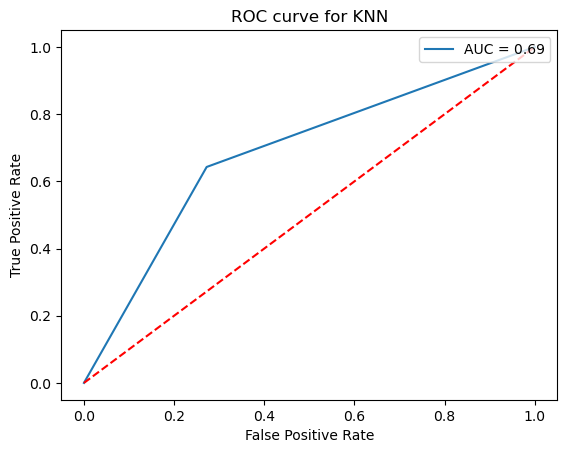

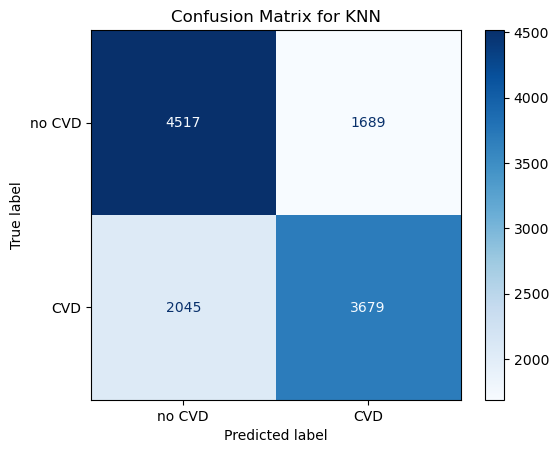

In [48]:
# ROC Curve
# We orginally had a scatter plot diagram to show the correlation of two features but we choose to remove it since we
# optimized KNN with Grid search
fpr, tpr, threshold = roc_curve(y_test, y_pred) # threshold from above box
roc_auc = roc_auc_score(y_test, y_pred) # auc score

plt.plot(fpr, tpr, label='AUC = %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for KNN')
plt.legend(loc="upper right")
plt.show()

# Confusion Matrix
cmd = ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=['no CVD', 'CVD'])  #using importation of ConfusionMatrixDisplay
cmd.plot(cmap='Blues')
plt.title("Confusion Matrix for KNN")
plt.show()

# Based on our KNN Alg., we also learned in class that anything below a AUC of .5 was not very good at predicting.
# Our AUC was well above .5 which means it was not the best, but it was moderate at distinguishing the differences
# between postive and negative classes.



# This was the unoptimized KNN method when n_neighbor was 5 and we didn't use GridSearchCV

Our KNN accuracy 66.72%
Our KNN recall 63.59%
Our KNN precision 65.87%


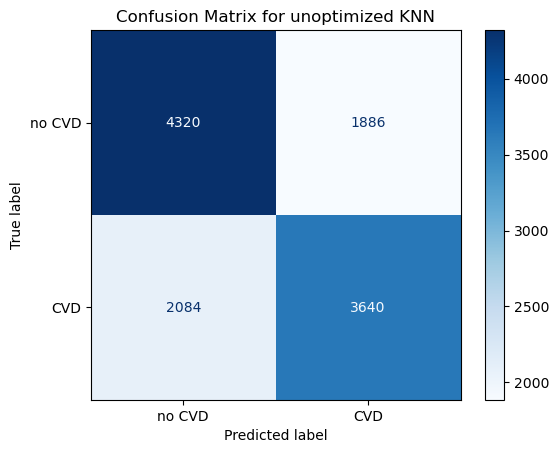

In [49]:
# this is for the extra 5 points for Hyper-parameter Optimization, before we used GridSearchCV we had n_neighbors as 5 
# which produced weak performance metrics

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5) # the bad n_neighbor
knn.fit(X_train, y_train)

y_actual=y_test
y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test,y_pred)
precision = precision_score(y_actual, y_pred)
accuracy,recall,precision = [x * 100 for x in (accuracy,recall,precision)]
rounded_accuracy = round(accuracy, 2) # accuracy score
rounded_recall = round(recall, 2) # recall score
rounded_precision = round(precision, 2) # precision score
cm5 = confusion_matrix(y_actual, y_pred) # confusion matrix
print("Our KNN accuracy",f"{rounded_accuracy}%")
print("Our KNN recall",f"{rounded_recall}%")
print("Our KNN precision",f"{rounded_precision}%")
cmd = ConfusionMatrixDisplay(confusion_matrix=cm5, display_labels=['no CVD', 'CVD'])  #using importation of ConfusionMatrixDisplay
cmd.plot(cmap='Blues')
plt.title("Confusion Matrix for unoptimized KNN")
plt.show()
# The average was lot higher when we used GridSearchCV and we found 9 to the most optimal (See stats above)
# The reason why it has a lower accuracy before using GridSearchCV for hyper-parameter optimization was because we had
# features that had high correlation, we could see that from the scatter plot from the optimized KNN alg. above.
# High correlation causes overfitting which means more redudancy and that causes a lower accuracy because KNN
# measures the distance between data points.

# Test sample and Result from KNN

In [50]:
# Random Sample we built to test
s = [{
    'age': 19000,
    'gender': 1,
    'height': 150,
    'weight': 60.0,
    'ap_hi': 180,
    'ap_low': 80,
    'cholestrol': 1,
    'gluc':1,
    'smoke': 0,
    'alco': 0,
    'active':1
},
]
test_df1 = pd.DataFrame(s)
predicted1 = knn.predict(test_df)
print("Predicted outcome: ", cardio_output[predicted[0]]) # corresponds to its integer representation, O returns first element of the array
print("First five predictions:", y_pred[:5])# printing first 5 predictions of model regardles of test sample,  0 = no CVD , 1 = CVD

Predicted outcome:  no CVD
First five predictions: [0 0 0 1 0]


# Naive Bayes Theorem (ML Algorithm #3) & Accuracy, Recall, Precision, and Confusion Matrix

In [51]:
# Naive Bayes
# GridSearch not needed since it focused on porbability from previous conditions
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train, y_train)

y_actual=y_test
y_pred = nb.predict(X_test)

accuracy = accuracy_score(y_test, y_pred) # accuracy score
recall = recall_score(y_test,y_pred) # recall score
precision = precision_score(y_actual, y_pred) # precision score
accuracy,recall,precision = [x * 100 for x in (accuracy,recall,precision)]
rounded_accuracy = round(accuracy, 2)
rounded_recall = round(recall, 2)
rounded_precision= round(precision, 2)
cm3 = confusion_matrix(y_actual, y_pred) # confusion matrix
print("Our Naive Bayes accuracy",f"{rounded_accuracy}%")
print("Our Naive Bayes recall",f"{rounded_recall}%")
print("Our Naive Bayes precision",f"{rounded_precision}%")

nb_accuracy = rounded_accuracy # used for dataframe at the end
nb_recall = rounded_recall # used for dataframe at the end
nb_prec = rounded_precision # used for dataframe at the end

Our Naive Bayes accuracy 71.55%
Our Naive Bayes recall 61.58%
Our Naive Bayes precision 74.68%


# Naive Bayes Diagram using a ROC Curve Plot, and a Confusion Matrix Diagram

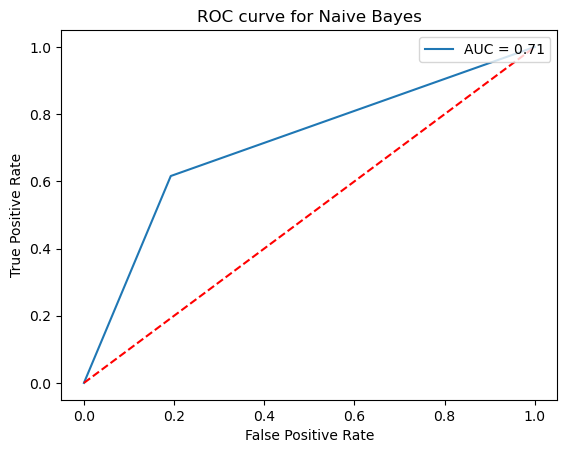

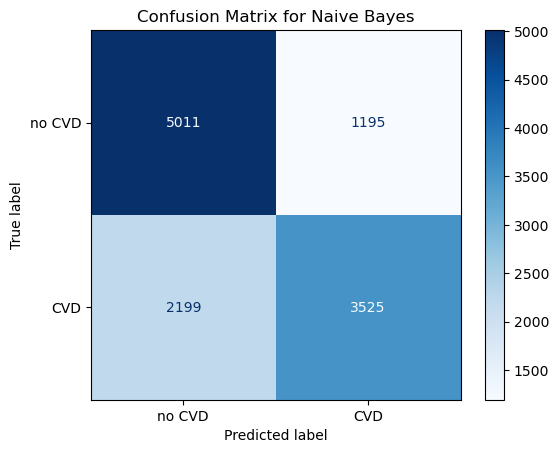

In [52]:
# ROC curve
fpr, tpr, threshold = roc_curve(y_test, y_pred) # threshold from above box
roc_auc = roc_auc_score(y_test, y_pred) # auc score

plt.plot(fpr, tpr, label='AUC = %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for Naive Bayes')
plt.legend(loc="upper right")
plt.show()

# Confusion Matrix
cmd = ConfusionMatrixDisplay(confusion_matrix=cm3, display_labels=['no CVD', 'CVD'])  #using importation of ConfusionMatrixDisplay
cmd.plot(cmap='Blues')
plt.title("Confusion Matrix for Naive Bayes")
plt.show()


# Based on our Naive Bayes Alg., we also learned in class that anything below a AUC of .5 was not very good at predicting.
# Our AUC was well above .5 which means it was not the best, but it was moderate at distinguishing the differences
# between postive and negative classes.

# Test sample and Result from Naive Bayes Theorem

In [53]:
# Random Sample we built to test
s = [{
    'age': 19000,
    'gender': 1,
    'height': 150,
    'weight': 60.0,
    'ap_hi': 180,
    'ap_low': 80,
    'cholestrol': 1,
    'gluc':1,
    'smoke': 0,
    'alco': 0,
    'active':1
},
]
test_df1 = pd.DataFrame(s)
predicted1 = nb.predict(test_df)
print("Predicted outcome: ", cardio_output[predicted[0]]) # corresponds to its integer representation, O returns first element of the array
print("First five predictions:", y_pred[:5]) # printing first 5 predictions of model regardless of test sample,  0 = no CVD , 1 = CVD

Predicted outcome:  no CVD
First five predictions: [0 0 0 0 0]


# Logistic Regression  (ML Algorithm #4) & Accuracy, Recall, Precision, and Confusion Matrix

In [54]:
# Logistic Regression
# Does not need GridSearch
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

scaler = StandardScaler()
X_train =scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

lr = LogisticRegression()
lr.fit(X_train, y_train)

y_actual=y_test
y_pred = lr.predict(X_test)

accuracy = accuracy_score(y_test, y_pred) # accuracy score
recall = recall_score(y_test,y_pred) # recall score
precision = precision_score(y_actual, y_pred) # precision score
accuracy,recall,precision = [x * 100 for x in (accuracy,recall,precision)]
rounded_accuracy = round(accuracy, 2)
rounded_recall = round(recall, 2)
rounded_precision = round(precision, 2)
cm4 = confusion_matrix(y_actual, y_pred) # confusion matrix
print("Our Logistic Regression accuracy",f"{rounded_accuracy}%")
print("Our Logistic Regression recall",f"{rounded_recall}%")
print("Our Logistic Regression precision",f"{rounded_precision}%")

lr_accuracy = rounded_accuracy # used for dataframe at the end
lr_recall = rounded_recall # used for dataframe at the end
lr_prec = rounded_precision # used for dataframe at the end

Our Logistic Regression accuracy 72.37%
Our Logistic Regression recall 65.51%
Our Logistic Regression precision 73.94%


# Logistic Regression Diagram using a Coefficient value plot , a ROC Curve Plot, and a Confusion Matrix Diagram

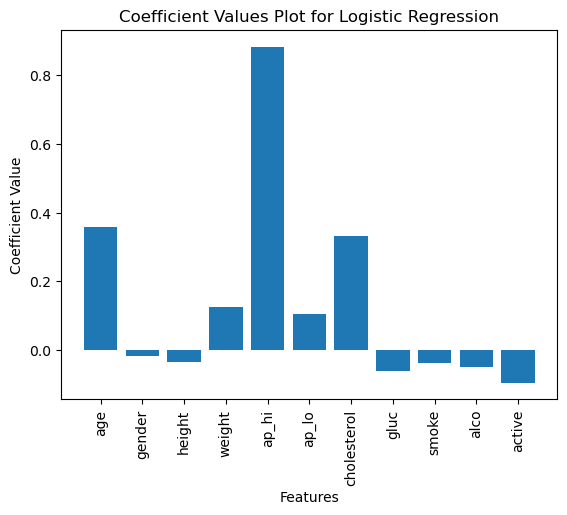

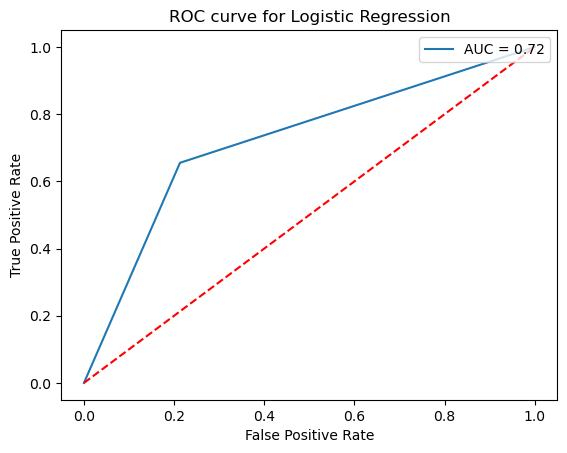

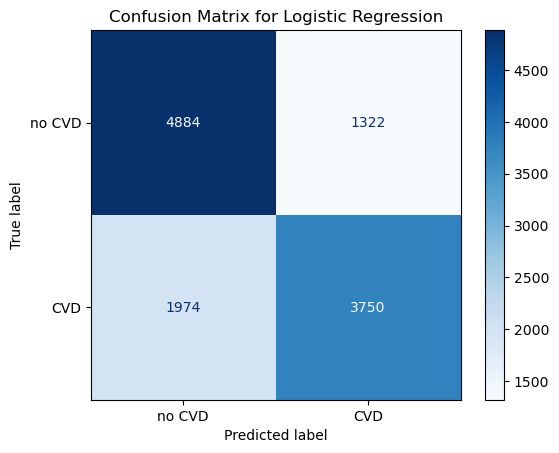

In [55]:
# Extract coefficients
coefficients = lr.coef_[0] # getting the coefficent values
coefficient_plot_features= X.columns # getting the names of the coefficent features


fig, plot = plt.subplots()
plot.bar(coefficient_plot_features, coefficients)
plot.set_xticks(range(len(coefficient_plot_features)))
plot.set_xticklabels(coefficient_plot_features, rotation=90)
plot.set_xlabel('Features')
plot.set_ylabel('Coefficient Value')
plot.set_title('Coefficient Values Plot for Logistic Regression')
plt.show()

fpr, tpr, threshold = roc_curve(y_test, y_pred) # threshold from above box
roc_auc = roc_auc_score(y_test, y_pred) # auc score

plt.plot(fpr, tpr, label='AUC = %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for Logistic Regression')
plt.legend(loc="upper right")
plt.show()

cmd = ConfusionMatrixDisplay(confusion_matrix=cm4, display_labels=['no CVD', 'CVD'])  #using importation of ConfusionMatrixDisplay
cmd.plot(cmap='Blues')
plt.title("Confusion Matrix for Logistic Regression")
plt.show()
# Coefficient Value Plots are very interesting diagram that we used in our report because
# a negative coefficient value has an inverse relationship, so as that corresponding feature increases, it affects
# the probability of the positive class. For example, the "active" feature is negative so as people exercise more
# they are less likely to have CVD. Whereas "ap_hi" is a positive coefficient value so as blood pressure goes up, you 
# are more likely to have a CVD.
# Based on our Logistic Regression Alg., we also learned in class that anything below a AUC of .5 was not very good at predicting.
# Our AUC was well above .5 which means it was not the best, but it was moderate at distinguishing the differences
# between postive and negative classes.

# Test Sample and Result from Logistic Regression

In [56]:
# Random Sample we built to test
s = [{
    'age': 19000,
    'gender': 1,
    'height': 150,
    'weight': 60.0,
    'ap_hi': 120,
    'ap_low': 80,
    'cholestrol': 1,
    'gluc':1,
    'smoke': 1,
    'alco': 1,
    'active':0
},

]

test_df = pd.DataFrame(s)

import warnings
warnings.filterwarnings('ignore', category=FutureWarning)


cardio_output = ["no CVD", "CVD"]
predicted = rf.predict(test_df)
print("Predicted outcome: ", cardio_output[predicted[0]])# corresponds to its integer representation, O returns first element of the array
print("First five predictions:", y_pred[:5])# printing first 5 predictions of model regardles of test sample,  0 = no CVD , 1 = CV  # 0 = no CVD , 1 = CVD

Predicted outcome:  no CVD
First five predictions: [0 0 0 0 0]


# Models Evaluations

In [57]:
evaluations = {'Algorithm': ['Random Forest', 'KNN', 'Naive Bayes Theorem', 'Logistic Regression'],
        'Accuracy(%)': [rf_accuracy, knn_accuracy, nb_accuracy, lr_accuracy],
        'Recall(%)': [rf_recall,knn_recall,nb_recall,lr_recall],
        'Precision(%)':[rf_prec,knn_prec,nb_prec,lr_prec]
              }

stats = pd.DataFrame(evaluations)
stats


,Algorithm,Accuracy(%),Recall(%),Precision(%)
0,Random Forest,70.49,68.31,69.61
1,KNN,68.70,64.27,68.54
2,Naive Bayes Theorem,71.55,61.58,74.68
3,Logistic Regression,72.37,65.51,73.94
